## Accessing your data from the database

- Please follow the steps in this notebook to have access to the dataset. 
- If you encounter any challenges please leave an issue on this repo here on GitHub

### Steps to take to use environment variables as opposed to credentials literals

1. Install pyodbc  - a package for creating connection strings to your remote database server
2. Install python-dotenv - a package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys
3. Import all the necessary libraies
   1. pyodbc (for creating a connection)
   2. python-dotenv (loading environment variables)
   3. os (for accessing the environement variables using the load_env function. This is not needed if you use the dotenv_values function instead)
4. Now create a file called .env in the root of your project folder (Note, the file name begins with a dot)
5. In the .env file, put all your sensitive information like server name, database name, username, and password

Example

   - SERVER='server_name_here'
   - DATABASE='database_name_here'
   - USERNAME='username_here'
   - PASSWORD='password_here'


6. Next create a .gitignore file (a new file with the name `.gitignore`. Note that gitignore file names begin with a dot)
7. Open the .gitignore file and type in the name of the .env file we just created like this "/.env". This will prevent git from tracking that file. Essesntially any file name in the gitignore file will be ignored by git and won't be checked into the repository
8. Create a connection by accessing your connection string with your defined environment variables

## Understanding the Business


India has experienced a surge in startups and funding, with over 16,000 new tech companies added in 2020. Despite funding obstacles, investment firms have shown confidence in Indian startups, with a total funding of $8.4 billion in 2023. India's startup ecosystem soars with unprecedented growth and funding

India's startup ecosystem, ranking third globally, boasts over 99,000 recognized startups and 108 unicorns valued at US$340.80 billion, with a bright future ahead

The Indian startup ecosystem is built on several key pillars, including government support, access to capital, a growing talent pool, and a supportive culture for entrepreneurship. One of the most important factors driving the growth of startups in India is the government's focus on supporting entrepreneurship.

The top three global ecosystems remain the same from 2020, with Silicon Valley at #1, followed by New York City and London tied at #2.


-Venturing into the Indian start-ups ecosystem
-To investigate the ecosystem and propose the best course of action

-We will analyze funding recieved by start-ups in India from 2018 to 2021.

-We will seek to ask the following questions to help us propose the best cousrse of action.


### QUESTIONS


3. Is there a significant variation in the average funding amount received by companies across Seed and Angel?
4. What is the average amount of funding received in 2018 compared to 2019
5. Which startup received more funding on the average
6. What is the average amount of funding received in 2020 compared to 2021
7. Is the average amount received by startups in Bangalore more than that od New Delhi?
8. 

9. How has the funding trend been from 2018 to 2021 
10. Which are the top cities for startup funding
11. Which are the top sectors for startup funding
12. How varied are the number of startups across the stages
13. Which startup stage received most funding
14. How is the funding trend of the sectors over the years
15. Which are the emerging sectors   

## 1
### Null Hypothesis : 
    Companies that are 10 years and above do not receive more than average amount
        
### Alternative Hypothesis : 
    Companies that are 10 years and above receive more than average amount

## 2
### Null Hypothesis:
    The average number of founders is the same in Mumbai and Noida
    
### Alternative Hypothesis
    The average number of founders is not the same in Mumbai and Noida
  
## 3
### Null Hypothesis:
    The average amount of funding recived in 2018 is more than or equal to that of 2019

### Alternative Hypothesis:
    The average amount of funding recieved in 2018 is less than that of 2019
    
## 4  
### Null Hypothesis: 
    The average amount of funding recived in 2020 is more than or equal to that of 2021

### Alternative Hypothesis: 
    The average amount of funding recieved in 2020 is less than that of 2021
    
## 5   
### Null Hypothesis:
    Companies belonging to Fintech recieved more than or equal to the average amount of funding
    
### Alternative Hypothesis:
    Companies belonging to Fintech recieved less than to the average amount of funding 
    
## 6    
### Null Hypothesis:
    The average amount of recieved by startups in Bangalore is more or equal to that of New Delhi
    
### Alternative Hypothesis:
     The average amount of recieved by startups in Bangalore is less than that of New Delhi

#### Step 1 and 2 - Install pyodbc and python-dotenv

#### Step 3 - Import all the necessary packages

In [1]:
import pyodbc
#import pymssql
#import pypyodbc

from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import warnings 

warnings.filterwarnings('ignore')


#### Step 4 - Create your .env file in the root of your project

#### Step 5 - In the .env file, put all your sensitive information like server name, password etc


#### Step 6 & 7 - Next create a .gitignore file and type '/.env' file we just created. This will prevent git from tracking that file.

#### Step 8 - Create a connection by accessing your connection string with your defined environment variables

## Undestanding the Data

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
driver = environment_variables.get("DRIVER")


In [3]:
# Create a connection string
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'


In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)


In [5]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM dbo.LP1_startup_funding2020"

df_fund2020 = pd.read_sql(query, connection)
df_fund2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [6]:
query1 = 'Select * from dbo.LP1_startup_funding2021'

df_fund2021 = pd.read_sql(query1, connection)
df_fund2021.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D


Next, get data from other sources and concatenate (Depends on the project) to perform your analysis

ALL THE BEST!!!

In [7]:
df_fund2018=pd.read_csv('startup_funding2018.csv')

In [8]:
df_fund2019=pd.read_csv('startup_funding2019.csv')


In [9]:
df_fund2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [10]:
df_fund2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


#### We will create year column for each dataframe before concatenating to helps us identify which year funding was awarded

In [11]:
df_fund2018['Year']=2018
df_fund2019['Year']=2019
df_fund2020['Year']=2020
df_fund2021['Year']=2021

In [12]:
df_fund2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [13]:
df_fund2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [14]:
df_fund2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  Year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [15]:
df_fund2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


### Observations

- 'Company Name' in df_fund2018 is the same as 'Company/Brand' in df_fund2019, same as 'Company_Brand' in df_fund2020 and same as 'Company_Brand' in df_fund2021

       - we will change Company Name in df_fund2018 to Company_Brand and Company/Brand in df_fund2019 will be change to Company_Brand.

- Founded is in all dataframes except df_fund2018

- We also observed that df_fund2018 contains Industry where as the remaining dataframes contains Sector, however after checking, we noticed the contain similar values.

       - we change Industry in df_fund2018 to Sector
    
- We observed that Location and headquater looks the same, we have Headquarter in all dataframes except df_fund2018, which contains Location
    
    - We will change Headquarter to Location
    
- We observed stage in df_fund2019, df_fund2020, df_fund2021 have the same values as Round/Series in df_fund2018
    
    - we will change Round/Series in df_fund2018 to stage
    
- we observed Amount in df_fund2019 is Amount($), where as all other dataframes contain Amount
    - we will change Amount($) to Amount
    
- we observed About Company in df_fund2018 has similar values as What_it_does in the remaining dataframes, in df_fund2019 there are no underscores
    - we change all to About Company
    

- we observe Founders is in all dataframes except df_fund2018

- we observe Investors is in all dataframes except df_fund2018

- We observed df_fund2020 contains Column10 with null values

    - we will drop column10




In [16]:
#Renaming the Columns for easy concatenation

df_fund2018=df_fund2018.rename(columns={'Company Name': 'Company_Brand'})
df_fund2018=df_fund2018.rename(columns={'Industry': 'Sector'})
df_fund2018=df_fund2018.rename(columns={'Round/Series': 'Stage'})
df_fund2019=df_fund2019.rename(columns={'Company/Brand': 'Company_Brand'})
df_fund2019=df_fund2019.rename(columns={'HeadQuarter': 'Location'})
df_fund2019=df_fund2019.rename(columns={'Amount($)': 'Amount'})
df_fund2019=df_fund2019.rename(columns={'What it does': 'About Company'})
df_fund2020=df_fund2020.rename(columns={'HeadQuarter': 'Location'})
df_fund2020=df_fund2020.rename(columns={'What_it_does': 'About Company'})
df_fund2021=df_fund2021.rename(columns={'HeadQuarter': 'Location'})
df_fund2021=df_fund2021.rename(columns={'What_it_does': 'About Company'})

## Cleaning the 2018 dataset

In [17]:
#Making a copy of 2018 dataframe

df18=df_fund2018.copy()

In [18]:
df18['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

#### Startup Stages

Startups typically progress through several stages of funding rounds, often referred to as "series." These series are indicative of the company's growth and development. Here are the common types of startup stages or series:


1. **Seed Stage (Pre-Seed, Seed Round):**
   - This is the earliest stage of funding where the startup is just getting off the ground.
   - Seed funding is used to validate the business idea, develop a prototype, and conduct initial market research.
   - Investors at this stage could include friends, family, angel investors, or early-stage venture capital firms.

2. **Series A:**
   - At this stage, the startup has usually developed a product or service and has some initial traction in the market.
   - Series A funding is typically used to scale the business operations, expand the team, and further develop the product.
   - Venture capital firms are the primary investors in Series A rounds, although some angel investors and early-stage investors may also participate.

3. **Series B:**
   - By the Series B stage, the startup has demonstrated significant growth potential and has a solid customer base.
   - The funding raised in Series B rounds is often used to further scale the business, enter new markets, and invest in marketing and sales efforts.
   - Venture capital firms continue to be the main source of funding at this stage, along with some participation from strategic investors.

4. **Series C and Beyond:**
   - These stages represent subsequent rounds of funding as the startup continues to grow and expand.
   - Series C, D, E, and so forth rounds may involve larger amounts of funding and can be used for various purposes such as further expansion, acquisitions, or preparing for an initial public offering (IPO).
   - At these later stages, the startup may attract investments from larger venture capital firms, private equity firms, hedge funds, or even corporate investors.

5. **Bridge Rounds:**
   - In between major funding rounds, startups may sometimes raise bridge rounds to provide additional runway while they prepare for the next significant financing round.
   - Bridge rounds are often smaller and may involve existing investors providing additional capital to sustain operations until the next major round.

Based on the above knowledge stages / series, we will rename some of the stage values in **all dataframes**

In [19]:
 
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Seed' + r'\b', 'Seed_Stage', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Angel' + r'\b', 'Seed_Stage', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Pre-Seed' + r'\b', 'Seed_Stage', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Grant' + r'\b', 'Seed_Stage', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Non-equity Assistance' + r'\b', 'Seed_Stage', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Funding Round' + r'\b', 'Seed_Stage', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Pre-Seed_Stage' + r'\b', 'Seed_Stage', regex=True)
 

In [20]:
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Venture - Series Unknown' + r'\b', 'Series A', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b'+ 'Secondary Market'+ r'\b', 'Series B', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b'+ 'Private Equity'+ r'\b', 'Series C', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b'+ 'Series H'+ r'\b', 'Series C', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b'+ 'Series E'+ r'\b', 'Series C', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b'+ 'Series D'+ r'\b', 'Series C', regex=True)

In [21]:
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Debt Financing' + r'\b', 'Bridge Rounds', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Post-IPO Debt' + r'\b', 'Bridge Rounds', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Corporate Round' + r'\b', 'Bridge Rounds', regex=True)
df18['Stage']=df18['Stage'].str.replace(r'\b' + 'Post-IPO Equity' + r'\b', 'Bridge Rounds', regex=True)

df18['Stage']=df18['Stage'].str.strip(']')
df18['Stage']=df18['Stage'].str.replace(r'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593','Undisclosed', regex=True)

In [22]:
df18['Stage'].unique()

array(['Seed_Stage', 'Series A', 'Series B', 'Series C', 'Bridge Rounds',
       'Undisclosed'], dtype=object)

In [23]:
#Replacing the digits part of value with nothing

df18['cur_symb18']=df18['Amount'].astype(str).replace(('\d'), '', regex= True)

In [24]:
#Checking the unique currency symbols 

df18['cur_symb18'].unique()

array(['', '₹,,', '—', '₹,', '$,', '$,,', '₹,,,', '$,,,'], dtype=object)

In [25]:
# Replacing the symbols with nothing

df18['Amount_no_symb18']=df18['Amount'].astype(str).replace('\D', '', regex= True)

In [26]:
#Checking to confirm changes were effected

df18.head(2)

,Company_Brand,Sector,Stage,Amount,Location,About Company,Year,cur_symb18,Amount_no_symb18
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed_Stage,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,,250000
1,Happy Cow Dairy,"Agriculture, Farming",Seed_Stage,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,"₹,,",40000000


In [27]:
#droping the amount column with symbol

df18=df18.drop('Amount',axis=1)

In [28]:
# Renaming columns

df18=df18.rename(columns={'Amount_no_symb18':'Amount'})
df18=df18.rename(columns={'cur_symb18':'Currency'})

In [29]:
#Changing Amount from object datatype to numeric type

df18['Amount']=pd.to_numeric(df18['Amount'])

In [30]:
# Confirming changes

df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  526 non-null    object 
 1   Sector         526 non-null    object 
 2   Stage          526 non-null    object 
 3   Location       526 non-null    object 
 4   About Company  526 non-null    object 
 5   Year           526 non-null    int64  
 6   Currency       526 non-null    object 
 7   Amount         378 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 33.0+ KB


In [31]:
df18['Currency']=df18['Currency'].str.replace(',','')

In [32]:
currency_value=df18.groupby('Currency')['Amount'].mean()
currency_value

Currency
     1.219853e+07
$    5.535524e+07
—             NaN
₹    5.903119e+08
Name: Amount, dtype: float64

In [33]:
df18.head()

,Company_Brand,Sector,Stage,Location,About Company,Year,Currency,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed_Stage,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,,250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed_Stage,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,₹,40000000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,₹,65000000.0
3,PayMe India,"Financial Services, FinTech",Seed_Stage,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed_Stage,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,—,NaN


#### converting rupees to dollars

- We noticed apart from 2020 dataset which has no currency symbol, 2019 and 2021 had dollar symbols

- we noticed that 2018 had both dollar and rupee symbols, since dollar is the dominant currency we decided to convert the rupees to dollars.
    The Average exchange rate in 2018 was 0.0146 USD (https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html).
    
- We also decided to assume where the currency is empty was dollar. 

In [34]:
# Exchange rate of rupee to dollars

exchange_rate = 0.0146
# convert exchange_rate from rupees to dollars and make a change to values with rupee symbol
df18.loc[df18['Currency'] == '₹', 'Amount'] *= exchange_rate
df18.head()

,Company_Brand,Sector,Stage,Location,About Company,Year,Currency,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed_Stage,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,,250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed_Stage,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,₹,584000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,₹,949000.0
3,PayMe India,"Financial Services, FinTech",Seed_Stage,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed_Stage,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,—,NaN


In [35]:
df18['Currency']='$'

In [36]:
df18.head()

,Company_Brand,Sector,Stage,Location,About Company,Year,Currency,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed_Stage,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,$,250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed_Stage,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,$,584000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,$,949000.0
3,PayMe India,"Financial Services, FinTech",Seed_Stage,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,$,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed_Stage,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,$,NaN


In [37]:
df18.columns

Index(['Company_Brand', 'Sector', 'Stage', 'Location', 'About Company', 'Year',
       'Currency', 'Amount'],
      dtype='object')

In [38]:
#df18['Company_Brand'].unique()

### Observations

- Guardian.in will be changed to GNC India
- NoPaperForms Solutions Pvt. Ltd is now Meritto- we will decide whether to replace
- Nutrisattva (Proliva) will be replaced by Nutrisattva Foods Pvt. Ltd.

In [39]:
#df18['Company_Brand']=df18['Company_Brand'].str.replace('Guardian.in', 'GNC India')

In [40]:
df18['Company_Brand'].isna().sum()

0

In [41]:
df18['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [42]:
'''in order to have The location of 2018 dataset to correspond with 
the other three dataset which have only one city as loaction, we picked 
the first city in the location column and dropped the remaining'''  

df18['Location'] = df18['Location'].str.split(',').str.get(0) 


In [43]:
df18['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [44]:
df18.isna().sum()

Company_Brand      0
Sector             0
Stage              0
Location           0
About Company      0
Year               0
Currency           0
Amount           148
dtype: int64

In [45]:
#df18[df18['Amount'].isna()]

In [46]:
df18.duplicated().sum()

1

In [47]:
df18=df18.drop_duplicates()

In [48]:
df18['Company_Brand'].duplicated().sum()

0

### **Overview of the Sector** 

Top performing sectors 
Several factors like increased internet penetration, digitization, and government initiatives have fueled the growth of top-funded sectors from 2014 to 2023 in India. These sectors include Retail, Enterprise Applications, Fintech, Transportation & Logistics tech, Food & Agriculture tech, Auto tech, Travel & Hospitality tech, and Edtech, the Tracxn report said. 

In the Deep Tech (R&D oriented) sector, Indian investment has been increasing steadily over the years with total funding of $6.73 billion, and in a decade, it received $6.23 billion, reflecting the country’s steady growth and commitment to science and technology. This trend emphasizes the importance of technology-driven innovation in shaping India's future.

New emerging sectors
Various new sectors such as DeepTech, SpaceTech, Artificial Intelligence, and EVs have broadened the Indian startup landscape. The Tracxn report stated that DeepTech has seen a rise in funding, reaching $2.1 billion in 2022, while the EV industry has seen $4.8 billion in funding in the past ten years

Top favorable cities for startups
Bengaluru remains the startup hub as the Karnataka capital received total funding of $70.4 billion in a decade, the report said, adding that Delhi-NCR and Mumbai stand at second and third spot respectively. 

Besides metro cities, several successful startups have also emerged in non-metropolitan areas such as Jaipur which has secured its position among the top cities in FinTech funding with $214 million in 2023.

### Sectors to include

1. Retail
- (the sale of goods to the public in relatively small quantities for use or consumption rather than for resale.)-**Source:Definitions from Oxford Languages**

2. Enterprise Applications -(ERPs, Saas, Autotech, Agritech, Healthtect) 
- (An enterprise application (EA) is a large software system platform typically designed to operate in a corporate environment such as business or government)-**Source: https://www.outsystems.com/tech-hub/app-dev/what-is-an-enterprise-app/**

3. Fintech 
- (computer programs and other technology used to support or enable banking and financial services.
"fintech is one of the fastest-growing areas for venture capitalists")-**Source:Definitions from Oxford Languages**
- (refers to any app, software, or technology that allows people or businesses to digitally access, manage, or gain insights into their finances or make financial transactions.)**source: https://plaid.com/resources/fintech/what-is-fintech/**


4. Supply Chain Management - Transportation & Logistics tech 
- (management of the flow of goods, data, and finances related to a product or service, from the procurement of raw materials to the delivery of the product at its final destination.)**Source:https://www.oracle.com/ke/scm/what-is-supply-chain-management**

5. Food & Agriculture 
- (The Food and agriculture industry produce a large range of primary agricultural products and processed foods contributing to feeding most of the world population)- **Source:https://www.who.int/teams/epi-win/food-and-agriculture-sectors**

6. Education 
- (the process of receiving or giving systematic instruction, especially at a school or university) **Source:Definitions from Oxford Languages**

7. Travel & Hospitality
- (Hospitality means extending a welcome to guests or offering a home away from home, and the word is derived from the Latin word “hospes” meaning host, visitor or stranger. The hospitality and tourism industry is a vast sector that includes all the economic activities that directly or indirectly contribute to, or depend upon, travel, tourism and hospitality) **Source:https://www.ehl.edu/en/what-is-hospitality**

8. Edtech
- (a combination of "education" and "technology") refers to hardware and software designed to enhance teacher-led learning in classrooms and improve students' education outcomes. **Source:https://www.investopedia.com/terms/e/edtech**

9. E-commerce
- commercial transactions conducted electronically on the internet **Source:Definitions from Oxford Languages**
- Types of E-commerce are Business-to-Business (B2B), Business-to-Consumer (B2C), Consumer-to-Consumer (C2C), Consumer-to-Business (C2B), Business-to-Administration (B2A) and Consumer-to-Administration (C2A) **Source:https://bloomidea.com/en/blog/types-e-commerce**

10. Banking and Finance 
- explores the dynamic, fast-paced world of money, shares, credit and investments.  Finance is an essential part of our economy as it provides the liquidity in terms of money or assets required for individuals and businesses to invest for the future. **Source:https://www.monash.edu/business/baf/study-options/why-banking-and-finance**
- Finance and Banking is the operation of the monetary business through banks and specialized financial instruments. In addition, Finance and Banking is closely related to money circulation services, playing an essential role in guiding a country's strategy and monetary policy. **Source:https://www.hoasen.edu.vn/tuyensinh/en/what-is-finance-and-banking-finance-and-banking-a-to-z**

11. Cosmetics & Jewelry
- A "cosmetic" is any substance used to clean, improve or change the complexion, skin, hair, nails or teeth. Cosmetics include beauty preparations (make-up, perfume, skin cream, nail polish) and grooming aids (soap, shampoo, shaving cream, deodorant) **Source:https://www.canada.ca/en/health-canada/services/cosmetics/what-is-cosmetic**
- personal ornaments, such as necklaces, rings, or bracelets, that are typically made from or contain jewels and precious metal **Source:Definitions from Oxford Languages**

12. Artificial Intelligence and Robotics
- AI allows articulated robots to perform tasks faster and more accurately. AI technologies infer information from vision sensors, such as 2D/3D cameras, to segment and understand scenes as well as detect and classify objects. **Source:https://www.intel.com/content/www/us/en/robotics/artificial-intelligence-robotics**
- 

13. Automotive & Electric Vehicles(EV)
- Anything automotive has to do with automobiles — in other words, cars. The automotive industry, for example, is all about making and selling cars. **Source:https://www.vocabulary.com/dictionary/automotive**

In [49]:
#Identifying the unique values in the Sector Column 

df18['Sector'] = df18['Sector'].apply(lambda x: x.lower() if isinstance(x, str) else x)

print(sorted(map(str, df18['Sector'].unique())))

#df18['Sector'].unique()

['3d printing, manufacturing, product design', 'accounting, apps, fintech', 'accounting, banking, finance', 'accounting, business information systems, business travel, finance, saas', 'advertising, artificial intelligence, digital media, ios, location based services, news, video, video on demand, video streaming', 'advertising, consulting, digital marketing', 'advertising, human resources, marketing', 'advertising, internet, marketing', 'aerospace', 'agriculture', 'agriculture, agtech, artificial intelligence, internet of things, machine learning', 'agriculture, agtech, manufacturing', 'agriculture, analytics, big data, farming', 'agriculture, farmers market, farming', 'agriculture, farming', 'agriculture, mobile', 'agtech, b2b, supply chain management', 'air transportation, freight service, logistics, marine transportation', 'alternative medicine, health care', 'analytics, apps, market research', 'analytics, audio, digital media, innovation management, internet radio, media and entert

**Observations**
- We observe there are list of Sectors for each company and for the purposes of our analysis, we will go with the first

In [50]:
#Replacing the _ symbol with e-commerce (in reference to the About Company column)

df18['Sector']=df18['Sector'].str.replace(r'—', 'e-commerce', regex=True)


#Replacing agtech with agritech
df18['Sector']=df18['Sector'].str.replace(r'agtech', 'agritech', regex=True)



In [51]:
#Choosing the first Sector from the list of Sectors in each row
df18['Sector'] = df18['Sector'].str.split(',').str.get(0) 

In [52]:
#Confirming our sector choice
df18['Sector'] = df18['Sector'].apply(lambda x: x.lower() if isinstance(x, str) else x)

print(sorted(map(str, df18['Sector'].unique())))

['3d printing', 'accounting', 'advertising', 'aerospace', 'agriculture', 'agritech', 'air transportation', 'alternative medicine', 'analytics', 'android', 'apps', 'artificial intelligence', 'audio', 'automotive', 'autonomous vehicles', 'b2b', 'banking', 'basketball', 'battery', 'beauty', 'big data', 'biopharma', 'biotechnology', 'blockchain', 'brand marketing', 'broadcasting', 'business development', 'business intelligence', 'business travel', 'career planning', 'catering', 'child care', 'children', 'classifieds', 'clean energy', 'cleantech', 'cloud computing', 'cloud infrastructure', 'collaboration', 'commercial', 'commercial real estate', 'communities', 'computer', 'consulting', 'consumer', 'consumer applications', 'consumer electronics', 'consumer goods', 'consumer lending', 'continuing education', 'cooking', 'cosmetics', 'creative agency', 'credit', 'credit cards', 'crowdfunding', 'crowdsourcing', 'cryptocurrency', 'customer service', 'dating', 'delivery', 'delivery service', 'dent

In [53]:
# A function to reorganize the sector column

df18['Main_Sector']=df18['Sector'].apply(lambda x: 'Automotive' if 'automobile' in x.lower() or 'electricv' in x.lower() or 'automotive' in x.lower() \
    or 'auto-tech' in x.lower() or 'battery' in x.lower() or 'electric vehicle' in x.lower() else  
    
    'Education' if 'edtech' in x.lower() or 'education' in x.lower() or 'edttech' in x.lower() or 'school' in x.lower() 
    or 'e-learning' in x.lower() or 'career planning' in x.lower() else \
    
    'Food & Agric' if 'agri' in x.lower() or 'food' in x.lower() or 'beverage' in x.lower() or 'dairy' in x.lower() or 'nutrition' in x.lower() \
    or 'soil-tech' in x.lower() or 'farming' in x.lower() or 'catering' in x.lower() else \
    
    'Technology' if 'technology' in x.lower() or 'logitech' in x.lower() or 'software' in x.lower() \
    or 'iot' in x.lower() or 'saas' in x.lower() or 'cloud' in x.lower() or 'api platform' in x.lower() or 'infotech' in x.lower() \
    or 'hrtech' in x.lower() or 'safety tech' in x.lower() or 'insuretech' in x.lower() or 'spacetech' in x.lower() \
    or 'legaltech' in x.lower() or 'infratech' in x.lower() or 'cybersecurity' in x.lower() or 'virtual auditing startup' in x.lower() \
    or 'internet' in x.lower() or 'enterprise resource planning (erp)' in x.lower() or 'artificial intelligence' in x.lower() \
    or 'deep' in x.lower() or 'defense tech' in x.lower() or 'data' in x.lower() or 'augr' in x.lower() or 'virtr' in x.lower() or 'automation' in x.lower() \
    or 'machine learning' in x.lower() or 'photonics' in x.lower() or 'robotics' in x.lower() or 'autonomous' in x.lower() \
    or 'telecommunication' in x.lower() or 'mobile' in x.lower() or 'systems' in x.lower() else \
    
    
    'Manufacturing' if 'aero company' in x.lower() or 'transport' in x.lower() or 'logistics' in x.lower() or 'packaging solution' in x.lower() or \
    'distribution' in x.lower() or 'supply_chain' in x.lower() or 'warehouse' in x.lower() else \
    
    'Travel_Hosp&Fashion' if 'travel' in x.lower() or 'accomodation' in x.lower() or 'housing' in x.lower() or 'micro-mobiity' in x.lower() or \
    'co-living' in x.lower() or 'co-working' in x.lower() or 'coworking' in x.lower() \
    or 'hospitality' in x.lower() or 'luxury' in x.lower() or 'rental' in x.lower() or 'wl & rac' in x.lower() or 'tourism' in x.lower() \
    or 'cosmetic' in x.lower() or 'jewel' in x.lower() or 'beauty' in x.lower() or 'fashion' in x.lower() \
    or 'skincare' in x.lower() or 'social commerce' in x.lower() else\
    
    
    'Healthcare' if 'health' in x.lower() or 'healthtech' in x.lower() or 'yoga' in x.lower() or 'bio' in x.lower() or 'eye' in x.lower()  \
    or 'fertility' in x.lower() or 'fitness' in x.lower() or 'hygiene' in x.lower() or 'med tech' in x.lower() or 'mental' in x.lower() \
    or 'sanitation' in x.lower() or 'laboratory' in x.lower() or 'pharma' in x.lower() or 'medical' in x.lower() \
    or 'wellness' in x.lower() or 'hospital' in x.lower() or 'veterinary' in x.lower() or 'dietary supplements' in x.lower() \
    or 'child care' in x.lower() or 'medicine' in x.lower() or 'dental' in x.lower() else \
    
    'Fintech' if 'fintech' in x.lower() or 'blockchain' in x.lower() or 'crypto' in x.lower() or 'mobile payments' in x.lower() else \
    
    'Banking & Finance' if 'bank' in x.lower() or 'fund' in x.lower() or 'escrow' in x.lower() or 'finance' in x.lower() or 'insurance' in x.lower() \
    or 'investment' in x.lower() or 'online credit' in x.lower() or 'venture capital' in x.lower() or 'taxation' in x.lower() \
    or 'accounting' in x.lower() or 'credit' in x.lower() or 'wealth' in x.lower() else \
    
        
    'Construction' if 'construction' in x.lower() or 'home design' in x.lower() or 'decor' in x.lower() or 'design' in x.lower() \
    or 'real estate' in x.lower() or 'proptech' in x.lower() or 'electricity' in x.lower() or 'solar' in x.lower() \
    or 'renewable power' in x.lower() or r'energy' in x.lower() else \
    
    
    'Service' if 'consultancy' in x.lower() or 'crowdsourcing' in x.lower() or r'services' in x.lower() or 'legal' in x.lower() \
    or 'human res' in x.lower() or 'recruitment' in x.lower() or 'market research' in x.lower() or 'consulting' in x.lower() \
    or 'creative agency' in x.lower() or 'business development' in x.lower() or 'customer service' in x.lower() \
    or 'delivery' in x.lower() or 'cooking' in x.lower() else \
    
    
    'Retail' if 'consumer' in x.lower() or 'fmcg' in x.lower() or 'marketing' in x.lower() or 'retail' in x.lower() \
    or 'sales' in x.lower() or 'personal care' in x.lower() or 'advertising' in x.lower() or 'children' in x.lower() or\
    'ad-tech' in x.lower() or 'b2b' in x.lower() or 'ecommerce' in x.lower() \
    or 'e-commerce' in x.lower() or 'e-market'in x.lower() or 'social media' in x.lower() or 'content' in x.lower() or 'digital' in x.lower() \
    or 'e store' in x.lower() or 'e tailor' in x.lower() or 'e-connect' in x.lower() or 'e-mobility' in x.lower() or 'e-tail' in x.lower() \
    or 'emobility' in x.lower() or 'estore' in x.lower() or 'job portal'in x.lower() or 'trading' in x.lower() \
    or 'marketplace' in x.lower() or 'classifieds' in x.lower() or 'commercial' in x.lower() or 'car trade' in x.lower() else \
    
    
    
    
    'Media & Entertainment' if 'media' in x.lower() or 'video' in x.lower() or 'publication' in x.lower() or 'dating app' in x.lower() \
    or 'entertain' in x.lower() or 'news' in x.lower() or 'broadcasting' in x.lower() or 'communities' in x.lower() \
    or 'events' in x.lower() or 'audio' in x.lower() or 'streaming' in x.lower() or 'file sharing' in x.lower() \
    or 'music' in x.lower() or 'dating' in x.lower() or 'wedding' in x.lower() or 'sport' in x.lower() or 'game' in x.lower() \
    or 'gaming' in x.lower() or 'basketball' in x.lower() else 'Other')

In [54]:
df18.sample(5)


,Company_Brand,Sector,Stage,Location,About Company,Year,Currency,Amount,Main_Sector
100,Aavas Financiers,finance,Bridge Rounds,Jaipur,Aavas Financiers is engaged in the business of...,2018,$,2.920000e+07,Banking & Finance
329,arzooo.com,consumer electronics,Seed_Stage,Bangalore,E-commerce website promising the best price on...,2018,$,2.190000e+05,Retail
101,Swiggy,food delivery,Series C,Bangalore,Swiggy is a food ordering and delivery company...,2018,$,1.000000e+09,Food & Agric
257,MySEODoc,e-commerce,Seed_Stage,Delhi,"SEO, PPC, Search Engine Marketing, Social Medi...",2018,$,NaN,Retail
106,Vivriti Capital,financial services,Series A,Chennai,Vivriti Capital is an online platform for inst...,2018,$,2.850000e+07,Service


In [55]:
df18['Main_Sector'].value_counts()

Main_Sector
Retail                   105
Technology                76
Service                   55
Healthcare                50
Other                     46
Banking & Finance         42
Food & Agric              34
Education                 32
Travel_Hosp&Fashion       24
Automotive                20
Media & Entertainment     20
Construction              10
Manufacturing              7
Fintech                    4
Name: count, dtype: int64

### Cleaning the 2019 dataset

In [56]:
#Making a copy of 2019 dataframe

df19=df_fund2019.copy()

In [57]:
df19.columns

Index(['Company_Brand', 'Founded', 'Location', 'Sector', 'About Company',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')

In [58]:
df19['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

#### We will decide whether to treat missing dates

In [59]:
df19['Founded'].isna().sum()

29

In [60]:
df19['Founded'].describe()

count      60.000000
mean     2014.533333
std         2.937003
min      2004.000000
25%      2013.000000
50%      2015.000000
75%      2016.250000
max      2019.000000
Name: Founded, dtype: float64

In [61]:
#Replacing the missing dates with 2014, which is approximate mean Founded date

df19['Founded']=df19['Founded'].fillna(2014)

In [62]:
df19['Founded'].isna().sum()

0

In [63]:
# Checking Unique values for Location to observe any abnormality

df19['Location'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [64]:
df19['Location'].isna().sum()

19

In [65]:
df19['Location'].describe()

count            70
unique           17
top       Bangalore
freq             21
Name: Location, dtype: object

- We will fill missing values with Bangalore which is the most frequent

In [66]:
#Filling missing Location with the mode

df19['Location']=df19['Location'].fillna('Bangalore')

In [67]:
# Confirming 

df19['Location'].unique()

array(['Bangalore', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Noida',
       'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [68]:
#df19['Founders'].unique()

##### observations
- Some some companies have multiple founders

In [69]:
df19['Founders'].isna().sum()

3

In [70]:
df19['Founders'].describe()

count                             86
unique                            85
top       Vivek Gupta, Abhay Hanjura
freq                               2
Name: Founders, dtype: object

##### We observe 3 missing values for Founders, we will not treat missing Founders, the most frequent apears only twice

In [71]:
df19['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [72]:
df19['Sector'].isna().sum()

5

In [73]:
df19[df19['Sector'].isna()]

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year
41,VMate,2014.0,Bangalore,NaN,A short video platform,NaN,Alibaba,"$100,000,000",NaN,2019
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...","$4,000,000",Series A,2019
52,TapChief,2016.0,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,"$1,500,000",Pre series A,2019
56,KredX,2014.0,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,"$26,000,000",Series B,2019
57,m.Paani,2014.0,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A,2019


In [74]:
#Replacing the NaNs with assumed sector based on the About Company Value

df19.loc[df19['About Company'] == 'A short video platform', 'Sector'] = 'Social Media'
df19.loc[df19['About Company'] == 'It supplies workforce to the economy', 'Sector'] = 'Education'
df19.loc[df19['About Company'] == 'It connects individuals in need of advice in a...', 'Sector'] = 'Counselling center'
df19.loc[df19['About Company'] == 'Invoice discounting platform', 'Sector'] = 'Banking'
df19.loc[df19['About Company'] == 'It digitizes and organises local retailers', 'Sector'] = 'E-commerce'

In [75]:
df19[df19['Sector'].isna()]

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year
52,TapChief,2016.0,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,"$1,500,000",Pre series A,2019


In [76]:
df19.iloc[52,4]

'It connects individuals in need of advice in a specific domain to individuals who have expertise in the same'

In [77]:
df19.loc[df19['About Company']=='It connects individuals in need of advice in a specific domain to individuals who have expertise in the same', 'Sector']='Artificial_I'

In [78]:
df19['Sector'].isna().sum()

0

In [79]:
df19['Sector'].describe()

count         89
unique        54
top       Edtech
freq           7
Name: Sector, dtype: object

In [80]:
df19['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', 'E-Sports',
       'Education', 'Cosmetics', 'B2B', 'Artificial_I', 'Jewellery',
       'B2B Supply Chain', 'Games', 'Banking', 'Food & tech',
       'Accomodation', 'Automotive tech', 'Legal tech', 'Mutual Funds',
       'Cybersecurity', 'Automobile', 'Sports', 'Healthtech',
       'Yoga & wellness', 'Virtual Banking', 'Transportation',
       'Transport & Rentals', 'Marketing & Customer loyalty', 'Infratech',
       'Hospitality', 'Automobile & Technology'], dtype=object)

In [81]:
df19['Main_Sector']=df19['Sector'].apply(lambda x: 'Automotive' if 'automobile' in x.lower() or 'electricv' in x.lower() or 'automotive' in x.lower() \
    or 'auto-tech' in x.lower() or 'battery' in x.lower() or 'electric vehicle' in x.lower() else  
    
    'Education' if 'edtech' in x.lower() or 'education' in x.lower() or 'edttech' in x.lower() or 'school' in x.lower() 
    or 'e-learning' in x.lower() or 'career planning' in x.lower() else \
    
    'Food & Agric' if 'agri' in x.lower() or 'food' in x.lower() or 'beverage' in x.lower() or 'dairy' in x.lower() or 'nutrition' in x.lower() \
    or 'soil-tech' in x.lower() or 'farming' in x.lower() or 'catering' in x.lower() else \
    
    'Technology' if 'technology' in x.lower() or 'logitech' in x.lower() or 'software' in x.lower() \
    or 'iot' in x.lower() or 'saas' in x.lower() or 'cloud' in x.lower() or 'api platform' in x.lower() or 'infotech' in x.lower() \
    or 'hrtech' in x.lower() or 'safety tech' in x.lower() or 'insuretech' in x.lower() or 'spacetech' in x.lower() \
    or 'legaltech' in x.lower() or 'infratech' in x.lower() or 'cybersecurity' in x.lower() or 'virtual auditing startup' in x.lower() \
    or 'internet' in x.lower() or 'enterprise resource planning (erp)' in x.lower() or 'artificial intelligence' in x.lower() \
    or 'deep' in x.lower() or 'defense tech' in x.lower() or 'data' in x.lower() or 'augr' in x.lower() or 'virtr' in x.lower() or 'automation' in x.lower() \
    or 'machine learning' in x.lower() or 'photonics' in x.lower() or 'robotics' in x.lower() or 'autonomous' in x.lower() \
    or 'telecommunication' in x.lower() or 'mobile' in x.lower() else \
    
    
    'Manufacturing' if 'aero company' in x.lower() or 'transport' in x.lower() or 'logistics' in x.lower() or 'packaging solution' in x.lower() or \
    'distribution' in x.lower() or 'supply_chain' in x.lower() or 'warehouse' in x.lower() else \
    
    'Travel_Hosp&Fashion' if 'travel' in x.lower() or 'accomodation' in x.lower() or 'housing' in x.lower() or 'micro-mobiity' in x.lower() or \
    'co-living' in x.lower() or 'co-working' in x.lower() or 'coworking' in x.lower() \
    or 'hospitality' in x.lower() or 'luxury' in x.lower() or 'rental' in x.lower() or 'wl & rac' in x.lower() or 'tourism' in x.lower() \
    or 'cosmetic' in x.lower() or 'jewel' in x.lower() or 'beauty' in x.lower() or 'fashion' in x.lower() \
    or 'skincare' in x.lower() or 'social commerce' in x.lower() else\
    
    
    'Healthcare' if 'health' in x.lower() or 'healthtech' in x.lower() or 'yoga' in x.lower() or 'bio' in x.lower() or 'eye' in x.lower()  \
    or 'fertility' in x.lower() or 'fitness' in x.lower() or 'hygiene' in x.lower() or 'med tech' in x.lower() or 'mental' in x.lower() \
    or 'sanitation' in x.lower() or 'laboratory' in x.lower() or 'pharma' in x.lower() or 'medical' in x.lower() \
    or 'wellness' in x.lower() or 'hospital' in x.lower() or 'veterinary' in x.lower() or 'dietary supplements' in x.lower() \
    or 'child care' in x.lower() or 'medicine' in x.lower() or 'dental' in x.lower() else \
    
    'Fintech' if 'fintech' in x.lower() or 'blockchain' in x.lower() or 'crypto' in x.lower() or 'mobile payments' in x.lower() else \
    
    'Banking & Finance' if 'bank' in x.lower() or 'fund' in x.lower() or 'escrow' in x.lower() or 'finance' in x.lower() or 'insurance' in x.lower() \
    or 'investment' in x.lower() or 'online credit' in x.lower() or 'venture capital' in x.lower() or 'taxation' in x.lower() \
    or 'accounting' in x.lower() or 'credit' in x.lower() or 'wealth' in x.lower() else \
    
        
    'Construction' if 'construction' in x.lower() or 'home design' in x.lower() or 'decor' in x.lower() or 'design' in x.lower() \
    or 'real estate' in x.lower() or 'proptech' in x.lower() or 'electricity' in x.lower() or 'solar' in x.lower() \
    or 'renewable power' in x.lower() or r'energy' in x.lower() else \
    
    
    'Service' if 'consultancy' in x.lower() or 'crowdsourcing' in x.lower() or r'services' in x.lower() or 'legal' in x.lower() \
    or 'human res' in x.lower() or 'recruitment' in x.lower() or 'market research' in x.lower() or 'consulting' in x.lower() \
    or 'creative agency' in x.lower() or 'business development' in x.lower() or 'customer service' in x.lower() \
    or 'delivery' in x.lower() or 'cooking' in x.lower() else \
    
    
    'Retail' if 'consumer' in x.lower() or 'fmcg' in x.lower() or 'marketing' in x.lower() or 'retail' in x.lower() \
    or 'sales' in x.lower() or 'personal care' in x.lower() or 'advertising' in x.lower() or 'children' in x.lower() or\
    'ad-tech' in x.lower() or 'b2b' in x.lower() or 'ecommerce' in x.lower() \
    or 'e-commerce' in x.lower() or 'e-market'in x.lower() or 'social media' in x.lower() or 'content' in x.lower() or 'digital' in x.lower() \
    or 'e store' in x.lower() or 'e tailor' in x.lower() or 'e-connect' in x.lower() or 'e-mobility' in x.lower() or 'e-tail' in x.lower() \
    or 'emobility' in x.lower() or 'estore' in x.lower() or 'job portal'in x.lower() or 'trading' in x.lower() \
    or 'marketplace' in x.lower() or 'classifieds' in x.lower() or 'commercial' in x.lower() or 'car trade' in x.lower() else \
    
    
    
    
    'Media & Entertainment' if 'media' in x.lower() or 'video' in x.lower() or 'publication' in x.lower() or 'dating app' in x.lower() \
    or 'entertain' in x.lower() or 'news' in x.lower() or 'broadcasting' in x.lower() or 'communities' in x.lower() \
    or 'events' in x.lower() or 'audio' in x.lower() or 'streaming' in x.lower() or 'file sharing' in x.lower() \
    or 'music' in x.lower() or 'dating' in x.lower() or 'wedding' in x.lower() or 'sport' in x.lower() or 'game' in x.lower() \
    or 'gaming' in x.lower() or 'basketball' in x.lower() else 'Other')

In [82]:
df19.head(5)

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year,Main_Sector
0,Bombay Shaving,2014.0,Bangalore,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019,Retail
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019,Education
2,Eduisfun,2014.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019,Education
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019,Construction
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019,Food & Agric


In [83]:
df19['Main_Sector'].value_counts()

Main_Sector
Technology               15
Retail                   13
Food & Agric             11
Education                 8
Other                     6
Travel_Hosp&Fashion       6
Automotive                6
Fintech                   5
Healthcare                5
Manufacturing             5
Banking & Finance         4
Media & Entertainment     3
Construction              1
Service                   1
Name: count, dtype: int64

In [84]:
df19['About Company'].unique()

array(['Provides a range of male grooming products',
       'A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students',
       'It aims to make learning fun via games.',
       'Provides interior designing solutions',
       'It is a seed company engaged in production, processing and marketing of seeds',
       'A drone automation platform',
       'It builds software products that makes work simpler, pleasant, and productive',
       'It is a product-based cybersecurity solutions provider',
       'It is an AI and big data services company providing business solutions.',
       'It is a eyewear company',
       'A B2C\xa0\xa0brand that focusses on premium and comfortable merchandise for Generation Alpha – kids',
       'It is a self-healing enterprise, the IT operations software detects, predicts and prevents problems before they happen',
       'Platform that provides complete financial solutions for excluded individuals 

- We will change **B2C\xa0\xa0brand** to **B2C brand**

In [85]:
import re

df19['About Company']=df19['About Company'].str.replace(r'\b' + 'B2C\xa0\xa0brand' + r'\b', 'B2C brand', regex=True)

In [86]:
df19['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
       'Innovation in Food and Agriculture (IFA)', 'Undisclosed',
       'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
       'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'SoftBank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners',
       'German development finance institution DEG',
       'South Africa’s Naspers Ventures, the CPP Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian VC Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund

**We Observe some unusual charactors**

- replace \xa0\xa091springboard with 91 Springboard

- replace \xa0\xa0Triodos with Triodos

In [87]:
df19['Investor']=df19['Investor'].str.replace(r'\xa0\xa091springboard', '91 Springboard', regex=True)
df19['Investor']=df19['Investor'].str.replace(r'\xa0\xa0Triodos', 'Triodos', regex=True)

In [88]:
df19['Investor'].isna().sum()

0

In [89]:
df19['Investor'].describe()

count              89
unique             86
top       Undisclosed
freq                3
Name: Investor, dtype: object

**We Observe Undisclosed is the most frequent, we assume those companies with missing Investor information chose not to disclose**
- We will therefore fill missing Investor with Undisclosed

In [90]:
df19['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

**The values are not standardised, we will standardise the values to match with stages in other columns**

In [91]:
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Fresh funding' + r'\b', 'Seed_Stage', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Pre series A' + r'\b', 'Seed_Stage', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Seed funding' + r'\b', 'Seed_Stage', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Seed round' + r'\b', 'Seed_Stage', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Seed fund' + r'\b', 'Seed_Stage', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Pre-series A' + r'\b', 'Seed_Stage', regex=True)

In [92]:
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Post series A' + r'\b', 'Series B', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'Series B+', 'Series B', regex=True)
df19['Stage']=df19['Stage'].str.strip('+')

In [93]:
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Series D' + r'\b', 'Series C', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Series G' + r'\b', 'Series C', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Series E' + r'\b', 'Series C', regex=True)
df19['Stage']=df19['Stage'].str.replace(r'\b' + 'Series F' + r'\b', 'Series C', regex=True)

In [94]:
df19['Stage'].unique()

array([nan, 'Series C', 'Seed_Stage', 'Series A', 'Series B'],
      dtype=object)

In [95]:
df19['Stage'].isna().sum()

46

In [96]:
# Checking for the most frequent to replace with missing values

df19['Stage'].describe()

count             43
unique             4
top       Seed_Stage
freq              13
Name: Stage, dtype: object

In [97]:
# Replacing missing stage with Seed_Stage

df19['Stage']=df19['Stage'].fillna('Seed_Stage')

In [98]:
df19['Amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [99]:
df19['cur_symb19']=df19['Amount'].str.replace('\d','', regex=True)

In [100]:
df19['cur_symb19'].unique()

array(['$,,', 'Undisclosed', '$,'], dtype=object)

In [101]:
df19['Amount_no_symb19']=df19['Amount'].str.replace('\D', '', regex= True)

In [102]:
df19['Amount_no_symb19'].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000', '',
       '1000000', '20000000', '275000000', '22000000', '5000000',
       '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000'], dtype=object)

In [103]:
#droping the amount column with symbol

df19=df19.drop('Amount',axis=1)

In [104]:
# Renaming columns

df19=df19.rename(columns={'Amount_no_symb19':'Amount'})
df19=df19.rename(columns={'cur_symb19':'Currency'})

In [105]:
#Changing Amount from object datatype to numeric type

df19['Amount']=pd.to_numeric(df19['Amount'])

In [106]:
df19['Currency'].unique()

array(['$,,', 'Undisclosed', '$,'], dtype=object)

In [107]:
df19['Currency']=df19['Currency'].str.strip(',')

In [108]:
df19['Currency'].unique()

array(['$', 'Undisclosed'], dtype=object)

In [109]:
df19.duplicated().sum()

0

In [110]:
df19.isna().sum()

Company_Brand     0
Founded           0
Location          0
Sector            0
About Company     0
Founders          3
Investor          0
Stage             0
Year              0
Main_Sector       0
Currency          0
Amount           12
dtype: int64

In [111]:
df19['Amount'].describe()

count    7.700000e+01
mean     4.333030e+07
std      1.106216e+08
min      1.000000e+05
25%      2.100000e+06
50%      6.000000e+06
75%      3.000000e+07
max      6.930000e+08
Name: Amount, dtype: float64

In [112]:
df19['Amount']=df19['Amount'].fillna(4.333030e+07)

In [113]:
df19.isna().sum()

Company_Brand    0
Founded          0
Location         0
Sector           0
About Company    0
Founders         3
Investor         0
Stage            0
Year             0
Main_Sector      0
Currency         0
Amount           0
dtype: int64

### Cleaning the 2020 dataset

In [114]:
# Making a copy of the 2020 dataset

df20=df_fund2020.copy()

In [115]:
df20.columns


Index(['Company_Brand', 'Founded', 'Location', 'Sector', 'About Company',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10', 'Year'],
      dtype='object')

- we will drop column10

In [116]:
df20=df20.drop('column10', axis=1)

In [117]:
df20['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.])

- Founded contains missing values that need to be treated, if it will have impact on our analysis.

In [118]:
df20['Founded'].isna().sum()


213

In [119]:
df20['Founded'].describe()

count     842.000000
mean     2015.363420
std         4.097909
min      1973.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: Founded, dtype: float64

In [120]:
df20['Founded']=df20['Founded'].fillna(2015)

In [121]:
df20['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [122]:
df20['Stage'].isna().sum()


464

- Stage is missing 462 rows, this will be treated if it will impact our analysis

In [123]:
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre-seed' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre-series' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage Funding' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre-Seed_Stage' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage round' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage Round' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre seed Round' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Angel Round' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre seed round' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage Investment' + r'\b', 'Seed_Stage', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage funding' + r'\b', 'Seed_Stage', regex=True)

In [124]:
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage A' + r'\b', 'Series A', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre- series A' + r'\b', 'Series A', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series A-1' + r'\b', 'Series A', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage & Series A' + r'\b', 'Series A', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre Series A' + r'\b', 'Series A', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre series A1' + r'\b', 'Series A', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre series A' + r'\b', 'Series A', regex=True)

In [125]:
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage B' + r'\b', 'Series B', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series B2' + r'\b', 'Series B', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre-Series B' + r'\b', 'Series B', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre series B' + r'\b', 'Series B', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Mid series' + r'\b', 'Series B', regex=True)

In [126]:
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Seed_Stage C' + r'\b', 'Series C', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series E' + r'\b', 'Series C', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series F' + r'\b', 'Series C', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series D' + r'\b', 'Series C', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series H' + r'\b', 'Series C', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Pre series C' + r'\b', 'Series C', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series C, D' + r'\b', 'Series C', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series D1' + r'\b', 'Series C', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Series E2' + r'\b', 'Series C', regex=True)

In [127]:
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Bridge' + r'\b', 'Bridge Rounds', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Bridge Rounds Round' + r'\b', 'Bridge Rounds', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Debt' + r'\b', 'Bridge Rounds', regex=True)
df20['Stage']=df20['Stage'].str.replace(r'\b' + 'Edge' + r'\b', 'Bridge Rounds', regex=True)

In [128]:
df20['Stage'].unique()

array([None, 'Seed_Stage', 'Series A', 'Series C', 'Series B',
       'Bridge Rounds'], dtype=object)

In [129]:
df20['Stage'].describe()

count          591
unique           5
top       Series A
freq           220
Name: Stage, dtype: object

- since Series A is the most frequent, we will replace the None values with Series A 

In [130]:
df20['Stage']=df20['Stage'].fillna(value='Series A')

In [131]:
df20['Stage'].unique()

array(['Series A', 'Seed_Stage', 'Series C', 'Series B', 'Bridge Rounds'],
      dtype=object)

In [132]:
#Converting the Amount column from object datatype to numeric type

df20['Amount']=pd.to_numeric(df20['Amount'])

In [133]:
'''
    Since dollar is the dorminant currency and 2020 data had no currency, we are assuming the currency was dollars
    '''

df20['Currency']='$'

In [134]:
df20.shape

(1055, 11)

In [135]:
df20['Sector'] = df20['Sector'].apply(lambda x: x.lower() if isinstance(x, str) else x)

print(sorted(map(str, df20['Sector'].unique())))


#df20['Sector'].unique()

['None', 'accomodation', 'ad-tech', 'aero company', 'agri tech', 'agriculture', 'agritech', 'agritech startup', 'agritech/commerce', 'ai', 'ai & data science', 'ai & debt', 'ai & deep learning', 'ai & media', 'ai company', 'ai health', 'ai platform', 'ai robotics', 'ai startup', 'api platform', 'appliance', 'ar platform', 'ar startup', 'ar/vr', 'ar/vr startup', 'auto-tech', 'automation', 'automation tech', 'automobile', 'automobile technology', 'automobiles', 'automotive', 'automotive and rentals', 'automotive company', 'automotive startup', 'automotive tech', 'ayurveda tech', 'b2b', 'b2b agritech', 'b2b marketplace', 'battery design', 'battery manufacturer', 'beauty', 'beauty & wellness', 'beverage', 'beverages', 'bike marketplace', 'biomaterial startup', 'biopharma', 'biotech', 'biotechnology company', 'blockchain', 'blockchain startup', 'car service', 'car trade', 'cleantech', 'cloud company', 'cloud kitchen', 'co-living', 'co-working', 'co-working startup', 'construction', 'constru

In [136]:



df20['Sector']=df20['Sector'].str.replace(r'paas', 'saas', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'supply chain', 'supply_chain', regex=True)

df20['Sector']=df20['Sector'].str.replace(r'sles', 'sales', regex=True)

df20['Sector']=df20['Sector'].str.replace(r'reatil', 'retail', regex=True)

df20['Sector']=df20['Sector'].str.replace(r'media tech', 'mediatech', regex=True)

df20['Sector']=df20['Sector'].str.replace(r'hr tech', 'hrtech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'techonology', 'Technology', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'healthcare/edtech', 'edtech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'saas\xa0\xa0startup', 'saas startup', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'saas/edtech', 'edtech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'agritech/commerce', 'e-commerce', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'mobility/transport', 'Supply_Chain', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'iot/automobile', 'Automobile', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'ai & debt', 'debt', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'b2b agritech', 'agritech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'heathtech', 'healthtech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'medtech', 'med tech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'insurance technology', 'insuretech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'insurance tech', 'insuretech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'insurtech', 'insuretech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'\b'+'ai'+ r'\b', 'Artificial Intelligence', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'\b'+'it'+ r'\b', 'Infotech', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'\b'+'Tech'+ r'\b', 'Technology', regex=True)

df20['Sector']=df20['Sector'].str.replace(r'\b'+'ev'+ r'\b', 'ElectricV', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'\b' +'ar'+ r'\b', 'AugR', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'\b' +'vr'+r'\b', 'VirtR', regex=True)

df20['Sector']=df20['Sector'].str.replace(r'\b' +'fm'+r'\b', 'fmcg', regex=True)

df20['Sector']=df20['Sector'].str.replace(r'\b' +'tech'+ r'\b', 'Technology', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'renewable player', 'renewable power', regex=True)

df20['Sector']=df20['Sector'].str.replace(r'deisgning', 'designing', regex=True)
df20['Sector']=df20['Sector'].str.replace(r'\b' +'hr'+ r'\b', 'human res', regex=True)



In [137]:
df20['Sector'].isna().sum()

13

In [138]:
df20['Sector'].describe()

count        1042
unique        270
top       fintech
freq          131
Name: Sector, dtype: object

In [139]:
#Filling missing values with the mode

df20['Sector']=df20['Sector'].fillna('Fintech')

In [140]:
# A function to reorganize the sector column

df20['Main_Sector']=df20['Sector'].apply(lambda x: 'Automotive' if 'automobile' in x.lower() or 'electricv' in x.lower() or 'automotive' in x.lower() \
    or 'auto-tech' in x.lower() or 'battery' in x.lower() or 'electric vehicle' in x.lower() else  
    
    'Education' if 'edtech' in x.lower() or 'education' in x.lower() or 'edttech' in x.lower() or 'school' in x.lower() 
    or 'e-learning' in x.lower() or 'career planning' in x.lower() else \
    
    'Food & Agric' if 'agri' in x.lower() or 'food' in x.lower() or 'beverage' in x.lower() or 'dairy' in x.lower() or 'nutrition' in x.lower() \
    or 'soil-tech' in x.lower() or 'farming' in x.lower() or 'catering' in x.lower() else \
    
    'Technology' if 'technology' in x.lower() or 'logitech' in x.lower() or 'software' in x.lower() \
    or 'iot' in x.lower() or 'saas' in x.lower() or 'cloud' in x.lower() or 'api platform' in x.lower() or 'infotech' in x.lower() \
    or 'hrtech' in x.lower() or 'safety tech' in x.lower() or 'insuretech' in x.lower() or 'spacetech' in x.lower() \
    or 'legaltech' in x.lower() or 'infratech' in x.lower() or 'cybersecurity' in x.lower() or 'virtual auditing startup' in x.lower() \
    or 'internet' in x.lower() or 'enterprise resource planning (erp)' in x.lower() or 'artificial intelligence' in x.lower() \
    or 'deep' in x.lower() or 'defense tech' in x.lower() or 'data' in x.lower() or 'augr' in x.lower() or 'virtr' in x.lower() or 'automation' in x.lower() \
    or 'machine learning' in x.lower() or 'photonics' in x.lower() or 'robotics' in x.lower() or 'autonomous' in x.lower() \
    or 'telecommunication' in x.lower() or 'mobile' in x.lower() else \
    
    
    'Manufacturing' if 'aero company' in x.lower() or 'transport' in x.lower() or 'logistics' in x.lower() or 'packaging solution' in x.lower() or \
    'distribution' in x.lower() or 'supply_chain' in x.lower() or 'warehouse' in x.lower() else \
    
    'Travel_Hosp&Fashion' if 'travel' in x.lower() or 'accomodation' in x.lower() or 'housing' in x.lower() or 'micro-mobiity' in x.lower() or \
    'co-living' in x.lower() or 'co-working' in x.lower() or 'coworking' in x.lower() \
    or 'hospitality' in x.lower() or 'luxury' in x.lower() or 'rental' in x.lower() or 'wl & rac' in x.lower() or 'tourism' in x.lower() \
    or 'cosmetic' in x.lower() or 'jewel' in x.lower() or 'beauty' in x.lower() or 'fashion' in x.lower() \
    or 'skincare' in x.lower() or 'social commerce' in x.lower() else\
    
    
    'Healthcare' if 'health' in x.lower() or 'healthtech' in x.lower() or 'yoga' in x.lower() or 'bio' in x.lower() or 'eye' in x.lower()  \
    or 'fertility' in x.lower() or 'fitness' in x.lower() or 'hygiene' in x.lower() or 'med tech' in x.lower() or 'mental' in x.lower() \
    or 'sanitation' in x.lower() or 'laboratory' in x.lower() or 'pharma' in x.lower() or 'medical' in x.lower() \
    or 'wellness' in x.lower() or 'hospital' in x.lower() or 'veterinary' in x.lower() or 'dietary supplements' in x.lower() \
    or 'child care' in x.lower() or 'medicine' in x.lower() or 'dental' in x.lower() else \
    
    'Fintech' if 'fintech' in x.lower() or 'blockchain' in x.lower() or 'crypto' in x.lower() or 'mobile payments' in x.lower() else \
    
    'Banking & Finance' if 'bank' in x.lower() or 'fund' in x.lower() or 'escrow' in x.lower() or 'finance' in x.lower() or 'insurance' in x.lower() \
    or 'investment' in x.lower() or 'online credit' in x.lower() or 'venture capital' in x.lower() or 'taxation' in x.lower() \
    or 'accounting' in x.lower() or 'credit' in x.lower() or 'wealth' in x.lower() else \
    
        
    'Construction' if 'construction' in x.lower() or 'home design' in x.lower() or 'decor' in x.lower() or 'design' in x.lower() \
    or 'real estate' in x.lower() or 'proptech' in x.lower() or 'electricity' in x.lower() or 'solar' in x.lower() \
    or 'renewable power' in x.lower() or r'energy' in x.lower() else \
    
    
    'Service' if 'consultancy' in x.lower() or 'crowdsourcing' in x.lower() or r'services' in x.lower() or 'legal' in x.lower() \
    or 'human res' in x.lower() or 'recruitment' in x.lower() or 'market research' in x.lower() or 'consulting' in x.lower() \
    or 'creative agency' in x.lower() or 'business development' in x.lower() or 'customer service' in x.lower() \
    or 'delivery' in x.lower() or 'cooking' in x.lower() else \
    
    
    'Retail' if 'consumer' in x.lower() or 'fmcg' in x.lower() or 'marketing' in x.lower() or 'retail' in x.lower() \
    or 'sales' in x.lower() or 'personal care' in x.lower() or 'advertising' in x.lower() or 'children' in x.lower() or\
    'ad-tech' in x.lower() or 'b2b' in x.lower() or 'ecommerce' in x.lower() \
    or 'e-commerce' in x.lower() or 'e-market'in x.lower() or 'social media' in x.lower() or 'content' in x.lower() or 'digital' in x.lower() \
    or 'e store' in x.lower() or 'e tailor' in x.lower() or 'e-connect' in x.lower() or 'e-mobility' in x.lower() or 'e-tail' in x.lower() \
    or 'emobility' in x.lower() or 'estore' in x.lower() or 'job portal'in x.lower() or 'trading' in x.lower() \
    or 'marketplace' in x.lower() or 'classifieds' in x.lower() or 'commercial' in x.lower() or 'car trade' in x.lower() else \
    
    
    
    
    'Media & Entertainment' if 'media' in x.lower() or 'video' in x.lower() or 'publication' in x.lower() or 'dating app' in x.lower() \
    or 'entertain' in x.lower() or 'news' in x.lower() or 'broadcasting' in x.lower() or 'communities' in x.lower() \
    or 'events' in x.lower() or 'audio' in x.lower() or 'streaming' in x.lower() or 'file sharing' in x.lower() \
    or 'music' in x.lower() or 'dating' in x.lower() or 'wedding' in x.lower() or 'sport' in x.lower() or 'game' in x.lower() \
    or 'gaming' in x.lower() or 'basketball' in x.lower() else 'Other')

In [141]:
df20.head()

#df20[df20['Main_Sector']=='Other']

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year,Currency,Main_Sector
0,Aqgromalin,2019.0,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A,2020,$,Food & Agric
1,Krayonnz,2019.0,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Seed_Stage,2020,$,Education
2,PadCare Labs,2018.0,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Seed_Stage,2020,$,Healthcare
3,NCOME,2020.0,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A,2020,$,Banking & Finance
4,Gramophone,2016.0,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A,2020,$,Food & Agric


In [142]:
df20['Main_Sector'].value_counts()

Main_Sector
Technology               224
Fintech                  147
Retail                   120
Education                117
Food & Agric             112
Healthcare                87
Media & Entertainment     65
Travel_Hosp&Fashion       50
Manufacturing             29
Automotive                29
Other                     23
Construction              22
Banking & Finance         20
Service                   10
Name: count, dtype: int64

In [143]:
df20['Location'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


**Observations**
- We identify some rows have multiple values for location
- We will pick first item, since the second and third items are either a country or a state.

In [144]:
#Choosing the first Location value from the list of cities in each row
df20['Location'] = df20['Location'].str.split(',').str.get(0) 

In [145]:
df20['Location'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', None, 'Singapore',
       'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Delhi',
       'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'Bangaldesh', 'London', 'Milano',
       'Palmwoods', 'France', 'Trivandrum', 'Cochin', 'Samastipur',
       'Irvine', 'Tumkur', 'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing',
       'Rajastan', 'Kochi', 'Ludhiana', 'Dehradun', 'San Franciscao',
       'Tangerang', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar',
       'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Banglore',
       'Coimbatore', 'Bengaluru'], dtype=object)

In [146]:
df20.duplicated().sum()

3

- There are duplicates in df20, these will be droped

In [147]:
df20=df20.drop_duplicates()

In [148]:
df20.duplicated().sum()

0

In [149]:
df20.isna().sum()

Company_Brand      0
Founded            0
Location          94
Sector             0
About Company      0
Founders          12
Investor          38
Amount           253
Stage              0
Year               0
Currency           0
Main_Sector        0
dtype: int64

In [150]:
#Confirming changes

df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Founded        1052 non-null   float64
 2   Location       958 non-null    object 
 3   Sector         1052 non-null   object 
 4   About Company  1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount         799 non-null    float64
 8   Stage          1052 non-null   object 
 9   Year           1052 non-null   int64  
 10  Currency       1052 non-null   object 
 11  Main_Sector    1052 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 106.8+ KB


### Cleaning the 2021 dataset

In [151]:
#Making a copy of 2021 dataset

df21=df_fund2021.copy()

In [152]:
df21.columns

Index(['Company_Brand', 'Founded', 'Location', 'Sector', 'About Company',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')

In [153]:
df21['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [154]:
df21[df21['Location']=='Food & Beverages']

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2021
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2021


In [155]:
df21.loc[df21['Location']=='Food & Beverages', 'Location']='hauz khas'
df21['Sector']=df21['Sector'].str.replace('hauz khas', 'Food & Beverages')

In [156]:
df21[df21['Location']=='hauz khas']

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year
241,MasterChow,2020.0,hauz khas,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2021
255,MasterChow,2020.0,hauz khas,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2021


In [157]:
#print(sorted(map(str, df21['Company_Brand'].unique())))

#df21['Company_Brand'].unique()

In [158]:
#Checking the unique values of founded

df21['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

**We observe Founded have missing dates** 

In [159]:
#Checking the unique values of Stage

df21['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

#### Observations

- we observe the data contains some values supposed to be in the Amount column

In [160]:
df21[df21['Stage']=='$1200000']

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [161]:
'''we will replace Upspark in Amount column with $1200000 and replace $1200000 in 
    Stage column with Seed_Stage since upsparks is a venture capital in its early stage 
    '''

df21.loc[df21['Stage'] == '$1200000', 'Amount'] = '$1200000'
df21['Stage']=df21['Stage'].str.replace('$1200000', 'Seed_Stage')

In [162]:
df21[df21['Stage']=='$300000']

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,2021
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,2021


In [163]:
'''we will replace $300000 in Stage column with Seed_Stage, since ah! Ventures and 
    ITO Angel Network, LetsVenture are Angel Investor and replace ah! Ventures in Amount column with $300000
    '''

df21.loc[df21['Amount'] == 'ah! Ventures', 'Stage'] = 'Seed_Stage'
df21['Amount']=df21['Amount'].str.replace('ah! Ventures', '$300000')
df21.loc[df21['Stage'] == '$300000', 'Amount'] = '$300000'
df21['Stage']=df21['Stage'].str.replace('$300000', 'Seed_Stage')

In [164]:
df21[df21['Stage']=='$6000000']

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000,2021


In [165]:
#we will replace $6000000 in Stage column with None and replace None in Amount column with $6000000

df21.loc[df21['Stage'] == '$6000000', 'Amount'] = '$6000000'
df21['Stage']=df21['Stage'].str.replace('$6000000', 'Seed_Stage')

In [166]:
df21[df21['Stage']=='$1000000']

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021


In [167]:
'''we will replace JITO Angel Network, LetsVenture in Stage column with Seed_Stage 
    and replace JITO Angel Network, LetsVenture in Amount column with $1000000
    '''

df21.loc[df21['Stage'] == '$1000000', 'Amount'] = '$1000000'
df21['Stage']=df21['Stage'].str.replace('$1000000', 'Seed_Stage')

In [168]:
df21['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Seed_Stage', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [169]:
 
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Pre-series A' + r'\b', 'Seed_Stage', regex=True) #Pre-series A implies before Series A, therefore replacing with seed_Stage
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Series D' + r'\b', 'Series C', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Seed' + r'\b', 'Seed_Stage', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Series E' + r'\b', 'Series C', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Pre-seed' + r'\b', 'Seed_Stage', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Pre-series B' + r'\b', 'Series A', regex=True)

 

In [170]:
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Bridge' + r'\b', 'Bridge Rounds', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Seed+'+ r'\b', 'Seed_Stage', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Series F2'+ r'\b', 'Series C', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Series A+'+ r'\b', 'Series B', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Series G'+ r'\b', 'Series C', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Series F'+ r'\b', 'Series C', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Debt' + r'\b', 'Bridge Rounds', regex=True)

In [171]:
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Series H' + r'\b', 'Series C', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Series B3' + r'\b', 'Series B', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'PE' + r'\b', 'Series B', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Series F1' + r'\b', 'Series C', regex=True)

In [172]:
df21['Stage']=df21['Stage'].str.replace(r'\b' + 'Pre-series A1' + r'\b', 'Series A', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Early seed'+ r'\b', 'Seed_Stage', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Series D1'+ r'\b', 'Series C', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Pre-series'+ r'\b', 'Seed_Stage', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Series A2'+ r'\b', 'Series A', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Seies A'+ r'\b', 'Series A', regex=True)
df21['Stage']=df21['Stage'].str.replace(r'\b'+ 'Series I'+ r'\b', 'Series C', regex=True)


In [173]:
df21['Stage']=df21['Stage'].str.strip('+')

In [174]:
df21['Stage'].unique()

array(['Seed_Stage', None, 'Series C', 'Series B', 'Bridge Rounds',
       'Series A'], dtype=object)

In [175]:
df21['Stage'].isna().sum()

428

In [176]:
df21['Stage'].describe()

count            781
unique             5
top       Seed_Stage
freq             460
Name: Stage, dtype: object

In [177]:
df21['Stage']=df21['Stage'].fillna('Seed_Stage')

In [178]:
#df21['Founders'] = df21['Founders'].apply(lambda x: x.lower() if isinstance(x, str) else x)

#print(sorted(map(str, df21['Founders'].unique())))


In [179]:
#About Company column

df21['About Company']=df21['About Company'].str.strip('#')

#print(sorted(map(str, df21['About Company'].unique())))


In [180]:
#Sector Column

df21['Sector'] = df21['Sector'].apply(lambda x:x.lower() if isinstance(x,str) else x)
print(sorted(map(str, df21['Sector'].unique())))
#sector to correspond other tables 

['advertisement', 'advisory firm', 'aeorspace', 'agritech', 'ai chatbot', 'ai company', 'ai startup', 'analytics', 'apparel & fashion', 'ar startup', 'arts & crafts', 'augmented reality', 'automation', 'automobile', 'automotive', 'aviation', 'aviation & aerospace', 'b2b', 'b2b e-commerce', 'b2b ecommerce', 'b2b manufacturing', 'b2b marketplace', 'b2b service', 'b2b startup', 'b2b travel', 'banking', 'battery', 'beauty products', 'beverages', 'bike rental', 'biotechnology', 'blockchain', 'blockchain startup', 'blogging', 'business supplies & equipment', 'cannabis startup', 'capital markets', 'celebrity engagement', 'cleantech', 'clothing', 'cloud kitchen', 'co-working', 'commerce', 'commercial real estate', 'community', 'community platform', 'company-as-a-service', 'computer & network security', 'computer games', 'computer software', 'construction', 'consulting', 'consumer electronics', 'consumer goods', 'consumer service', 'consumer services', 'consumer software', 'content commerce', '

In [181]:
# A function to rationalise the sector column

df21['Main_Sector']=df21['Sector'].apply(lambda x: 'Automotive' if 'automobile' in x.lower() or 'electricv' in x.lower() or 'automotive' in x.lower() \
    or 'auto-tech' in x.lower() or 'battery' in x.lower() or 'electric vehicle' in x.lower() else  
    
    'Education' if 'edtech' in x.lower() or 'education' in x.lower() or 'edttech' in x.lower() or 'school' in x.lower() 
    or 'e-learning' in x.lower() or 'career planning' in x.lower() else \
    
    'Food & Agric' if 'agri' in x.lower() or 'food' in x.lower() or 'beverage' in x.lower() or 'dairy' in x.lower() or 'nutrition' in x.lower() \
    or 'soil-tech' in x.lower() or 'farming' in x.lower() or 'catering' in x.lower() else \
    
    'Technology' if 'technology' in x.lower() or 'logitech' in x.lower() or 'software' in x.lower() \
    or 'iot' in x.lower() or 'saas' in x.lower() or 'cloud' in x.lower() or 'api platform' in x.lower() or 'infotech' in x.lower() \
    or 'hrtech' in x.lower() or 'safety tech' in x.lower() or 'insuretech' in x.lower() or 'spacetech' in x.lower() \
    or 'legaltech' in x.lower() or 'infratech' in x.lower() or 'cybersecurity' in x.lower() or 'virtual auditing startup' in x.lower() \
    or 'internet' in x.lower() or 'enterprise resource planning (erp)' in x.lower() or 'artificial intelligence' in x.lower() \
    or 'deep' in x.lower() or 'defense tech' in x.lower() or 'data' in x.lower() or 'augr' in x.lower() or 'virtr' in x.lower() or 'automation' in x.lower() \
    or 'machine learning' in x.lower() or 'photonics' in x.lower() or 'robotics' in x.lower() or 'autonomous' in x.lower() \
    or 'telecommunication' in x.lower() or 'mobile' in x.lower() else \
    
    
    'Manufacturing' if 'aero company' in x.lower() or 'transport' in x.lower() or 'logistics' in x.lower() or 'packaging solution' in x.lower() or \
    'distribution' in x.lower() or 'supply_chain' in x.lower() or 'warehouse' in x.lower() else \
    
    'Travel_Hosp&Fashion' if 'travel' in x.lower() or 'accomodation' in x.lower() or 'housing' in x.lower() or 'micro-mobiity' in x.lower() or \
    'co-living' in x.lower() or 'co-working' in x.lower() or 'coworking' in x.lower() \
    or 'hospitality' in x.lower() or 'luxury' in x.lower() or 'rental' in x.lower() or 'wl & rac' in x.lower() or 'tourism' in x.lower() \
    or 'cosmetic' in x.lower() or 'jewel' in x.lower() or 'beauty' in x.lower() or 'fashion' in x.lower() \
    or 'skincare' in x.lower() or 'social commerce' in x.lower() else\
    
    
    'Healthcare' if 'health' in x.lower() or 'healthtech' in x.lower() or 'yoga' in x.lower() or 'bio' in x.lower() or 'eye' in x.lower()  \
    or 'fertility' in x.lower() or 'fitness' in x.lower() or 'hygiene' in x.lower() or 'med tech' in x.lower() or 'mental' in x.lower() \
    or 'sanitation' in x.lower() or 'laboratory' in x.lower() or 'pharma' in x.lower() or 'medical' in x.lower() \
    or 'wellness' in x.lower() or 'hospital' in x.lower() or 'veterinary' in x.lower() or 'dietary supplements' in x.lower() \
    or 'child care' in x.lower() or 'medicine' in x.lower() or 'dental' in x.lower() else \
    
    'Fintech' if 'fintech' in x.lower() or 'blockchain' in x.lower() or 'crypto' in x.lower() or 'mobile payments' in x.lower() else \
    
    'Banking & Finance' if 'bank' in x.lower() or 'fund' in x.lower() or 'escrow' in x.lower() or 'finance' in x.lower() or 'insurance' in x.lower() \
    or 'investment' in x.lower() or 'online credit' in x.lower() or 'venture capital' in x.lower() or 'taxation' in x.lower() \
    or 'accounting' in x.lower() or 'credit' in x.lower() or 'wealth' in x.lower() else \
    
        
    'Construction' if 'construction' in x.lower() or 'home design' in x.lower() or 'decor' in x.lower() or 'design' in x.lower() \
    or 'real estate' in x.lower() or 'proptech' in x.lower() or 'electricity' in x.lower() or 'solar' in x.lower() \
    or 'renewable power' in x.lower() or r'energy' in x.lower() else \
    
    
    'Service' if 'consultancy' in x.lower() or 'crowdsourcing' in x.lower() or r'services' in x.lower() or 'legal' in x.lower() \
    or 'human res' in x.lower() or 'recruitment' in x.lower() or 'market research' in x.lower() or 'consulting' in x.lower() \
    or 'creative agency' in x.lower() or 'business development' in x.lower() or 'customer service' in x.lower() \
    or 'delivery' in x.lower() or 'cooking' in x.lower() else \
    
    
    'Retail' if 'consumer' in x.lower() or 'fmcg' in x.lower() or 'marketing' in x.lower() or 'retail' in x.lower() \
    or 'sales' in x.lower() or 'personal care' in x.lower() or 'advertising' in x.lower() or 'children' in x.lower() or\
    'ad-tech' in x.lower() or 'b2b' in x.lower() or 'ecommerce' in x.lower() \
    or 'e-commerce' in x.lower() or 'e-market'in x.lower() or 'social media' in x.lower() or 'content' in x.lower() or 'digital' in x.lower() \
    or 'e store' in x.lower() or 'e tailor' in x.lower() or 'e-connect' in x.lower() or 'e-mobility' in x.lower() or 'e-tail' in x.lower() \
    or 'emobility' in x.lower() or 'estore' in x.lower() or 'job portal'in x.lower() or 'trading' in x.lower() \
    or 'marketplace' in x.lower() or 'classifieds' in x.lower() or 'commercial' in x.lower() or 'car trade' in x.lower() else \
    
    
    
    
    'Media & Entertainment' if 'media' in x.lower() or 'video' in x.lower() or 'publication' in x.lower() or 'dating app' in x.lower() \
    or 'entertain' in x.lower() or 'news' in x.lower() or 'broadcasting' in x.lower() or 'communities' in x.lower() \
    or 'events' in x.lower() or 'audio' in x.lower() or 'streaming' in x.lower() or 'file sharing' in x.lower() \
    or 'music' in x.lower() or 'dating' in x.lower() or 'wedding' in x.lower() or 'sport' in x.lower() or 'game' in x.lower() \
    or 'gaming' in x.lower() or 'basketball' in x.lower() else 'Other')

In [182]:
df21.sample(5)

#df21[df21['Main_Sector']=='Other']

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year,Main_Sector
43,LimeChat,2020.0,"Faridabad, Haryana",ai chatbot,Limechat provides a personalised shopping expe...,"Aniket Bajpai, Nikhil Gupta","Stellaris Venture Partners, Ramakant Sharma","$7,500,000",Seed_Stage,2021,Other
762,Livve Homes,2017.0,Bangalore,rental space,"India's homegrown online portal, championing t...",Maya Lakshman,Angel investors,"$5,000,000",Seed_Stage,2021,Travel_Hosp&Fashion
49,CredFlow,2020.0,New Delhi,fintech,CredFlow provides financial solutions to autom...,Kunal Aggarwal,"Stellaris Venture Partners, Omidyar Network In...","$2,000,000",Seed_Stage,2021,Fintech
1011,MarketWolf,2017.0,Mumbai,financial services,MarketWolf provides everyone an opportunity to...,"Vishesh Dhingra, Thomas Joseph","Anil Thadani, Ashutosh Sinha, Roy van Leeuwen",$5500000,Seed_Stage,2021,Service
736,BYJU'S,2011.0,Bangalore,edtech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","BlackRock, Owl Ventures","$460,000,000",Series C,2021,Education


In [183]:
df21['Main_Sector'].value_counts()

Main_Sector
Other                    161
Technology               153
Education                133
Fintech                  131
Retail                   115
Healthcare               114
Service                   91
Food & Agric              72
Media & Entertainment     61
Travel_Hosp&Fashion       53
Manufacturing             39
Automotive                35
Construction              30
Banking & Finance         21
Name: count, dtype: int64

In [184]:
#location column
#print(df21['Location'].unique())
 
value_map_location = {
    'Pharmaceuticals\t#REF!': 'Pharmaceuticals',
    'Online Media\t#REF!': 'Online Media',
    'Gurugram\t#REF!': 'Gurugram'
    
}
#observation on pharmaceuticals and Information Technology $ Services


In [185]:

# Use the map function to replace values
df21['Location'] = df21['Location'].map(value_map_location).fillna(df21['Location'])
print(df21['Location'].unique())
#print(df21[(df21['Location'] == 'Pharmaceuticals') | (df21['Location'] == 'Information Technology & Services')])


['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' None 'Small Towns, Andhra Pradesh' 'Goa'
 'Rajsamand' 'Ranchi' 'Faridabad, Haryana' 'Gujarat' 'Pune' 'Thane'
 'Computer Games' 'Cochin' 'Noida' 'Chandigarh' 'Gurgaon' 'Vadodara'
 'hauz khas' 'Pharmaceuticals' 'Kolkata' 'Ahmedabad' 'Mohali' 'Haryana'
 'Indore' 'Powai' 'Ghaziabad' 'Nagpur' 'West Bengal' 'Patna' 'Samsitpur'
 'Lucknow' 'Telangana' 'Silvassa' 'Thiruvananthapuram' 'Faridabad'
 'Roorkee' 'Ambernath' 'Panchkula' 'Surat' 'Coimbatore' 'Andheri'
 'Mangalore' 'Telugana' 'Bhubaneswar' 'Kottayam' 'Beijing' 'Panaji'
 'Satara' 'Orissia' 'Jodhpur' 'New York' 'Santra' 'Mountain View, CA'
 'Trivandrum' 'Jharkhand' 'Kanpur' 'Bhilwara' 'Guwahati' 'Online Media'
 'Kochi' 'London' 'Information Technology & Services' 'The Nilgiris'
 'Gandhinagar']


In [186]:
df21.loc[df21['Location'] == 'Pharmaceuticals', 'Sector'] = 'Pharmaceuticals'
df21.loc[df21['Location'] == 'Information Technology & Services', 'Sector'] = 'Information Technology & Services'

df21.iloc[242, df21.columns.get_loc('About Company')] = 'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.'
df21.iloc[256, df21.columns.get_loc('About Company')] = 'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.'

df21.iloc[242, df21.columns.get_loc('Founders')] = 'Varun Khanna'
df21.iloc[256, df21.columns.get_loc('Founders')] = 'Varun Khanna'

df21.iloc[242, df21.columns.get_loc('Investor')] = 'morgan stanley private equity asia'
df21.iloc[256, df21.columns.get_loc('Investor')] = 'morgan stanley private equity asia'


df21.loc[df21['Location'] == 'Pharmaceuticals', 'Location'] = 'NaN'
df21.loc[df21['Location'] == 'Information Technology & Services', 'Location'] = 'Manchester, greater manchester'

df21.iloc[242, df21.columns.get_loc('Amount')] = 22000000
df21.iloc[256, df21.columns.get_loc('Amount')] = 22000000


In [187]:
df21[(df21['Sector'] == 'Pharmaceuticals') | (df21['Sector'] == 'Information Technology & Services')]
df21.iloc[1100, df21.columns.get_loc('Sector')] = 'Online Media'


In [188]:
conf=df21[(df21['Sector'] == 'Pharmaceuticals') | (df21['Sector'] == 'Information Technology & Services')]
conf

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Amount,Stage,Year,Main_Sector
242,Fullife Healthcare,2009.0,NaN,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,morgan stanley private equity asia,22000000,Seed_Stage,2021,Healthcare
256,Fullife Healthcare,2009.0,NaN,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,morgan stanley private equity asia,22000000,Seed_Stage,2021,Healthcare
1176,Peak,2014.0,"Manchester, greater manchester",Information Technology & Services,Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C,2021,Other


In [189]:

print(df21[(df21['Investor'] == '$Undisclosed') | (df21['Investor'] == '1000000\t#REF!')]) 
print(df21[(df21['Investor'] == '$1000000') | (df21['Investor'] == '$5000000')]) 
print(df21[(df21['Investor'] == '$300000') | (df21['Investor'] == '2000000')]) 


     Company_Brand  Founded      Location                    Sector  \
1100      Sochcast   2020.0  Online Media              Online Media   
1148     Godamwale   2016.0        Mumbai  logistics & supply chain   

                                          About Company  \
1100  CA Harvinderjit Singh Bhatia, Garima Surana, A...   
1148  Godamwale is tech enabled integrated logistics...   

                                       Founders        Investor Amount  \
1100    Vinners, Raj Nayak, Amritaanshu Agrawal    $Undisclosed   None   
1148  Basant Kumar, Vivek Tiwari, Ranbir Nandan  1000000\t#REF!   Seed   

           Stage  Year            Main_Sector  
1100  Seed_Stage  2021  Media & Entertainment  
1148  Seed_Stage  2021          Manufacturing  
    Company_Brand  Founded  Location  \
257       MoEVing   2021.0  Gurugram   
545     AdmitKard   2016.0     Noida   

                                                Sector  \
257  moeving is india's only electric mobility focu...   
545 

In [190]:
df21.iloc[1100, df21.columns.get_loc('Location')] = 'NaN'
df21.iloc[1100, df21.columns.get_loc('About Company')] = 'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience'
df21.iloc[1100, df21.columns.get_loc('Investor')] = 'CA Harvinderjit Singh Bhatia, Garima Surana, Anil Srivatsa'


In [191]:
df21.iloc[257, df21.columns.get_loc('Investor')] = 'Vikash Mishra, Mragank Jain'
df21.iloc[257, df21.columns.get_loc('About Company')] =  'moeving is india"s only electric mobility focused Technology Platform with a vision to accelerate EV adoption in India.'
df21.iloc[257, df21.columns.get_loc('Sector')]  = 'NaN'
df21.iloc[545, df21.columns.get_loc('Investor')]  = 'NaN'

In [192]:

#print(df21[(df21['Investor'] == '2000000') | (df21['Investor'] == '$5000000')]) 
df21.loc[df21['Investor'] == '1000000\t#REF!', 'Amount'] = '1000000'
df21.loc[df21['Investor'] == '$1000000', 'Amount'] = '1000000'

df21.loc[df21['Investor'] == '$5000000', 'Amount'] = '5000000'
df21.loc[df21['Investor'] == '$300000', 'Amount'] = '300000'


In [193]:
df21.loc[df21['Investor'] == '2000000', 'Investor'] = 'NaN'
df21.loc[df21['Investor'] == '1000000\t#REF!', 'Investor'] = 'NaN'



In [194]:

replace_dict = {
    '\ufeff': ''  # Replace '\ufeff' with an empty string
}


In [195]:


# Apply the replacement to the 'Investor' column
df21['Investor'] = df21['Investor'].str.replace(r'|'.join(replace_dict.keys()), lambda x: replace_dict[x.group()], regex=True)
df21['Investor'] = df21['Investor'].apply(lambda x: x.lower() if isinstance(x, str) else x)

#print(df21['Investor'].unique())


In [196]:
df21['Investor']=df21['Investor'].str.replace(r'http://100x.vc/','100X')

In [197]:
df21['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [198]:
#df21[df21['Amount']=='Undisclosed']

In [199]:
#Swapping Seed value at Amount column to Stage column

df21.loc[df21['Amount']=='Seed', 'Stage']='Seed_Stage'
df21.loc[df21['Amount']=='Pre-series A', 'Stage']='Series A'

df21.iloc[545, df21.columns.get_loc('Amount')]='NaN'
df21.iloc[257, df21.columns.get_loc('Amount')]='NaN'

df21['Amount']=df21['Amount'].str.replace('Undisclosed', 'NaN')

In [200]:
df21['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'NaN', '$1,000,000',
       '$3,000,000', '$100,000', '$700,000', '$9,000,000', '$40,000,000',
       '$49,000,000', '$400,000', '$300,000', '$25,000,000',
       '$160,000,000', '$150,000', '$1,800,000', '$5,000,000', '$850,000',
       '$53,000,000', '$500,000', '$1,100,000', '$6,000,000', '$800,000',
       '$10,000,000', '$21,000,000', '$7,500,000', '$26,000,000',
       '$7,400,000', '$1,500,000', '$600,000', '$800,000,000',
       '$17,000,000', '$3,500,000', '$15,000,000', '$215,000,000',
       '$2,500,000', '$350,000,000', '$5,500,000', '$83,000,000',
       '$110,000,000', '$500,000,000', '$65,000,000', '$150,000,000,000',
       '$300,000,000', '$2,200,000', '$35,000,000', '$140,000,000',
       '$4,000,000', '$13,000,000', None, '$NaN', '$2000000', '$800000',
       '$6000000', '$2500000', '$9500000', '$13000000', '$5000000',
       '$8000000', '$1000000', '$1

In [201]:
#Replacing the digits partof Amount with nothing

df21['Currency']=df21['Amount'].astype(str).replace(('\d'), '', regex= True)

In [202]:
#Checking for type of symbols 

df21['Currency'].unique()

array(['$,,', '$,', 'NaN', '$,,,', 'None', '$NaN', '$', 'nan', '$$,',
       '$undisclosed', '$$,,', ''], dtype=object)

In [203]:
#Replacing the symbols with nothing

df21['Amount_no_symb21']=df21['Amount'].astype(str).replace('\D', '', regex= True)

In [204]:
#df21['Amount_no_symb21'].unique()

In [205]:
df21=df21.drop('Amount', axis=1)

In [206]:
df21=df21.rename({'Amount_no_symb21': 'Amount'}, axis=1)

In [207]:
df21.head(2)

,Company_Brand,Founded,Location,Sector,About Company,Founders,Investor,Stage,Year,Main_Sector,Currency,Amount
0,Unbox Robotics,2019.0,Bangalore,ai startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","beenext, entrepreneur first",Seed_Stage,2021,Other,"$,,",1200000
1,upGrad,2015.0,Mumbai,edtech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","unilazer ventures, iifl asset management",Seed_Stage,2021,Education,"$,,",120000000


In [208]:
df21['Currency']='$'

In [209]:
df21['Currency'].unique()

array(['$'], dtype=object)

In [210]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   Location       1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   About Company  1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Stage          1209 non-null   object 
 8   Year           1209 non-null   int64  
 9   Main_Sector    1209 non-null   object 
 10  Currency       1209 non-null   object 
 11  Amount         1209 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 113.5+ KB


In [211]:
df21['Amount']=pd.to_numeric(df21['Amount'])

In [212]:
df21.duplicated().sum()

24

In [213]:
df21=df21.drop_duplicates()

In [214]:
df21['Amount'].isna().sum()

143

In [215]:
df21['Amount'].describe()

count    1.042000e+03
mean     1.723376e+08
std      4.646669e+09
min      1.000000e+04
25%      1.000000e+06
50%      3.700000e+06
75%      1.500000e+07
max      1.500000e+11
Name: Amount, dtype: float64

In [216]:
#df21['Amount'].fillna(3.500000e+06)

In [217]:
df21.iloc[98, df21.columns.get_loc('Location')] = 'Nan'


## Concatenating all the dataframes

In [218]:
df_concat=pd.concat([df18,df19,df20,df21], ignore_index=True)

In [219]:
df_concat.head()

,Company_Brand,Sector,Stage,Location,About Company,Year,Currency,Amount,Main_Sector,Founded,Founders,Investor
0,TheCollegeFever,brand marketing,Seed_Stage,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,$,250000.0,Retail,NaN,NaN,NaN
1,Happy Cow Dairy,agriculture,Seed_Stage,Mumbai,A startup which aggregates milk from dairy far...,2018,$,584000.0,Food & Agric,NaN,NaN,NaN
2,MyLoanCare,credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,2018,$,949000.0,Banking & Finance,NaN,NaN,NaN
3,PayMe India,financial services,Seed_Stage,Noida,PayMe India is an innovative FinTech organizat...,2018,$,2000000.0,Service,NaN,NaN,NaN
4,Eunimart,e-commerce platforms,Seed_Stage,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,$,NaN,Retail,NaN,NaN,NaN


In [220]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2851 non-null   object 
 1   Sector         2851 non-null   object 
 2   Stage          2851 non-null   object 
 3   Location       2756 non-null   object 
 4   About Company  2851 non-null   object 
 5   Year           2851 non-null   int64  
 6   Currency       2851 non-null   object 
 7   Amount         2307 non-null   float64
 8   Main_Sector    2851 non-null   object 
 9   Founded        2325 non-null   float64
 10  Founders       2307 non-null   object 
 11  Investor       2228 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 267.4+ KB


In [221]:
df_concat.duplicated().sum()

0

In [222]:
df_concat=df_concat.drop_duplicates()

In [223]:
df_concat.isna().sum()

Company_Brand      0
Sector             0
Stage              0
Location          95
About Company      0
Year               0
Currency           0
Amount           544
Main_Sector        0
Founded          526
Founders         544
Investor         623
dtype: int64

In [224]:
#checking the statistics of the columns
df_concat.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,2851,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2851,583,fintech,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2851,6,Seed_Stage,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2756,131,Bangalore,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
About Company,2851,2691,BYJU'S is an educational technology company th...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2851.0,NaN,NaN,NaN,2020.016135,1.087933,2018.0,2020.0,2020.0,2021.0,2021.0
Currency,2851,2,$,2839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,2307.0,NaN,NaN,NaN,121422004.586476,3446668571.070957,876.0,1000000.0,3000000.0,12000000.0,150000000000.0
Main_Sector,2851,14,Technology,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,2325.0,NaN,NaN,NaN,2015.938065,4.153834,1963.0,2015.0,2016.0,2019.0,2021.0


**Observations**

In [225]:
df_concat['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', None, 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 'Irvi

In [226]:
#since Bengaluru and Bangalore are the same city, we will replace Bangalore with Bengaluru since the later is the official name of the city

df_concat['Location']=df_concat['Location'].str.replace('Bangalore', 'Bengaluru')
df_concat['Location']=df_concat['Location'].str.replace('Banglore', 'Bengaluru')

In [227]:
df_concat['Location'].unique()

array(['Bengaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Bengaluru City', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Telangana', 'Gurugram',
       'Surat', 'Uttar pradesh', 'Rajasthan', 'Tirunelveli', None,
       'Singapore', 'Gujarat', 'Kerala', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area', 'Bangaldesh',
       'London', 'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine',
       'Tumkur'

### Univariate Analysis

In [228]:
num_cols=df_concat.select_dtypes(include='number')


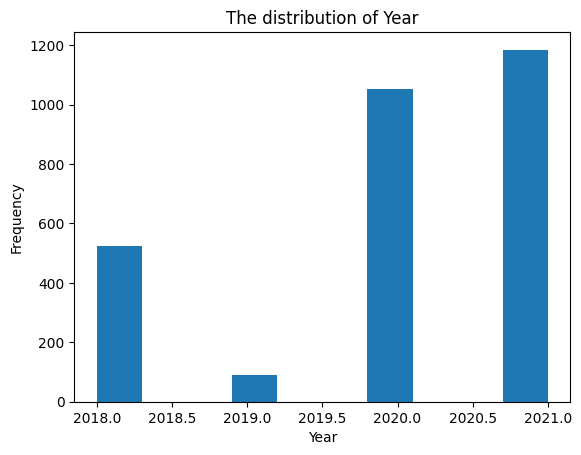

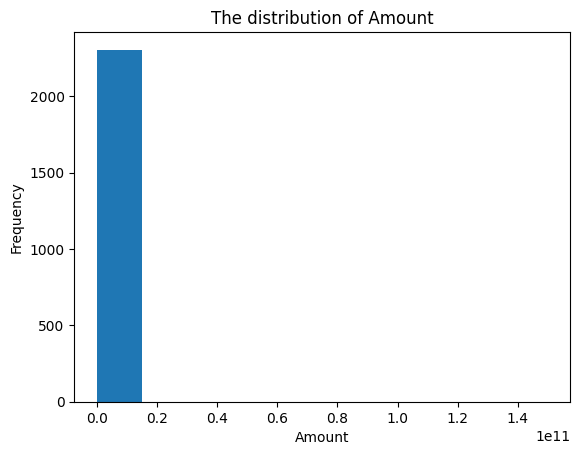

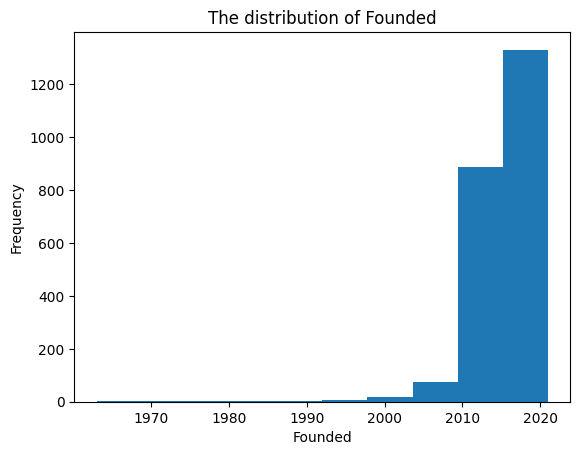

In [229]:
for column in num_cols:
    plt.hist(df_concat[column], bins=10, histtype='bar')
    plt.title(f'The distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Observations**

- 2019 recorded the lowest funding frequency, this might be due to the covid 19 pandemic, there was a steep increase from 2019 to 2020, 2021 had the highest funding frequency

- The Amount column is skewed to the right with concentration at the left (lower) end

- Majority of Companies were founded between 2010 and 2021

**Treating Outliers in the Amount column**

In [ ]:
#Calculating the 25th and 75th quantiles to identify the upper and lower limits

seventy_fifth = df_concat['Amount'].quantile(0.75)
twenty_fifth = df_concat['Amount'].quantile(0.25)

iqr_amount = seventy_fifth-twenty_fifth 

upper = seventy_fifth+(1.5*iqr_amount)
lower = twenty_fifth-(1.5*iqr_amount)

outlier_rows = df_concat[(df_concat['Amount'] > upper) | (df_concat['Amount'] < lower)]


In [ ]:
#Creating a new dataframe without the outliers in the Amount column

df_no_outlier = df_concat[(df_concat.Amount > lower ) & (df_concat.Amount<upper)]




In [ ]:

#Checking the ditribution of the Amount column using box plot
plt.figure(figsize=(5,2))
sns.boxplot(x='Amount', data=df_no_outlier)
plt.xticks(rotation=45)
plt.title('The distribution of Amount after removing outliers')
plt.show()


plt.figure(figsize=(5,2))
plt.hist(df_no_outlier['Amount'], bins=10)
plt.xticks(rotation=90)
plt.xlabel('Amount Recieved')
plt.ylabel('Frequency')
plt.show()

In [ ]:
cat_cols=df_concat.select_dtypes(include='object').columns
cat_cols


In [ ]:

plt.figure(figsize=(5,2))
plt.hist(df_no_outlier['Main_Sector'])
plt.title('The distribution of Main Sectors')
plt.xticks(rotation=90)
plt.xlabel('Main Sectors')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(5,2))
plt.hist(df_no_outlier['Company_Brand'])
plt.title('The distribution of Company Brand')
plt.xticks([])
plt.xlabel('Company Brand')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(5,2))
plt.hist(df_no_outlier['Stage'])
plt.title('The distribution of Stage of Company')
plt.xticks(rotation=90)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.show()

### Bi-variate Analysis


In [ ]:
#Reducing the Amount values by 10,000 to make values more readable

df_no_outlier['Amount(10000)']=df_no_outlier['Amount']/10000


## Questions 1 & 2

#### What is the average amount of funding received in 2018 compared to 2019?
#### What is the average amount of funding received in 2020 compared to 2021?

In [ ]:
avg_fund_yr=df_no_outlier.groupby('Year')['Amount(10000)'].agg([('Average Fund','mean'), ('Total Fund','sum')])
avg_fund_yr


In [ ]:

avg_fund_yr.plot.line( y=['Average Fund'], figsize=(5,2) )
plt.title('The trend of average funding per year')
plt.xlabel('Year')
plt.ylabel('Amount(10,000)')
plt.legend([])
plt.show()


avg_fund_yr.plot.bar(y=['Average Fund'], figsize=(5,2))
plt.title('The trend of average funding per year')
plt.xlabel('Year')
plt.ylabel('Amount(10,000)')
plt.legend([])
plt.show()

#### Observations

- 2019 is the year with highest average funding
- The average funding recieved in 2019 is higher than that of 2018
- The average funding recieved in 2020 is slighly higher than that of 2021


## Questions 3

#### How has the funding trend been from 2018 to 2021?



In [ ]:
avg_fund_yr.plot.line( y=['Total Fund'], figsize=(5,2) )
plt.title('The trend of Total funding per year')
plt.ylabel('Amount(10,000)')
plt.xlabel([])
plt.legend([])
plt.show()


avg_fund_yr.plot.bar( y=['Total Fund'], figsize=(5,2) )
plt.xlabel('Year')
plt.ylabel('Amount(10,000)')
plt.legend([])
plt.show()

#### Observations

- Total fundind fell from 2018 t0 2019 and rose from 2019 to 2021
- 2021 recorded the highest funding followed by 2020 and 2018
- 2019 recieved the lowest total funding, despite been the year with the highest average funding, this might be due to the covid 19 pandemic.   


In [ ]:
#Grouping start-up companies per their total funding amount recieved  
fund_per_startup_top10=df_no_outlier.groupby('Company_Brand')['Amount(10000)'].agg([('Total fund', 'sum')]).sort_values(by='Total fund', ascending=False).head(10)
fund_per_startup_top10


In [ ]:
fund_per_startup_top10.plot.bar( y=['Total fund'], figsize=(5,2) )
plt.title('Top 10 start-ups that recieved the highest funding')
plt.xlabel('Company')
plt.ylabel('Amount(10,000)')
plt.legend([])
plt.show()

#### Observations

- **Aye Finance** was the start-up that recieved the highest funding


## Questions 5

#### Which are the top 10 cities with more start-ups?


In [ ]:
top10_cities_per_startups=df_no_outlier.groupby('Location')['Company_Brand'].agg([('Number 0f Start-ups', 'count')]).\
                            sort_values(by='Number 0f Start-ups', ascending=False).head(10)
top10_cities_per_startups


In [ ]:
top10_cities_per_startups.plot.bar( y=['Number 0f Start-ups'], figsize=(5,2) )
plt.title('The top 10 cities with more start-ups')
plt.xlabel('Cities')
plt.ylabel('Number 0f Start-ups')
plt.legend([])
plt.show()

#### Observations

- The Top 10 cities with most start-ups counts as shown in the chart above
- Bengaluru is the city with most start-ups followed by Mumbai, Gurugram, New Delhi, Chennai, Pune, Hyderabad, Gurgaon, Noida and Delhi respectively


## Questions 6

#### Which are the top 10 cities that attract most start-up funding?


In [ ]:
top10_cities_per_fund=df_no_outlier.groupby('Location')['Amount(10000)'].agg([('Total Funds', 'sum'), ('Average Funds', 'mean')]).\
                            sort_values(by='Total Funds', ascending=False).head(10)

av_top10_cities_per_fund=top10_cities_per_fund.sort_values(by='Average Funds', ascending=False)
top10_cities_per_fund

In [ ]:
top10_cities_per_fund.plot.bar(y=['Total Funds'], figsize=(5,2))

plt.title('The total funding recieved by top 10 cities')
plt.xlabel('Cities')
plt.ylabel('Total fund (10,000)')
plt.legend([])
plt.show()


av_top10_cities_per_fund.plot.bar(y=['Average Funds'], figsize=(5,2))

plt.title('The average funding of top 10 cities')
plt.xlabel('Cities')
plt.ylabel('Average funding (10,000)')
plt.legend([])
plt.show()

#### Observations

- We observe that when you look at total revenue Bengaluru was the city that recieves the highest funding, followed by Mumbai, Gurugram, New Delhi, Chennai, Pune, Gurgaon, Noida, Hyderabad and Delhi respectively

- We also observe that on the average companies in Gurugram received the highest funding followed by Bengaluru, Mumbai, New Delhi, Chennai, Gurgaon, Noida, Pune, Delhi and Hyderabad respectively. 



## Questions 7

#### Which are the top 10 sectors that attract most start-up funding?


In [ ]:
top_sector_per_fund=df_no_outlier.groupby('Main_Sector')['Amount(10000)'].agg([('Average Fund', 'mean'), ('Total Fund', 'sum')]).\
                        sort_values(by='Total Fund', ascending =False)

av_top_sector_per_fund=top_sector_per_fund.sort_values(by='Average Fund', ascending=False)


In [ ]:
top_sector_per_fund.plot.bar(y=['Total Fund'], figsize=(5,2))

plt.title('The total funding recieved by Sectors')
plt.xlabel('Cities')
plt.ylabel('Total fund (10,000)')
plt.legend([])
plt.show()



av_top_sector_per_fund.plot.bar(y=['Average Fund'], figsize=(5,2))

plt.title('The average funding of recieved by Sectors')
plt.xlabel('Cities')
plt.ylabel('Average fund(10,000)')
plt.legend([])
plt.show()

#### Observations

- Fintech is the sector that recieved most funding in terms of total funding followed by Technology, Retail, Food and Agric, Education, Healthcare, Services, Tavel & hospitality & Fahion, Manufacturing, Media and intertainment, Construction, Banking & Finance, and Automotive respectively

- On the average the companies in Funtech sector recieved more funding, followed by Manufacturing, Construction, Food & Agric, Service, Retail, Healthcare, Travel & Hospitality and Fashion, Education, Automotive, Technology, Banking & Finance and Media and Entertainment 


## Questions 8

#### How has the funding trend been for the sectors over the years?


In [ ]:

top_sector_year_per_fund=df_no_outlier.groupby(['Main_Sector','Year'])['Amount(10000)'].agg([('Average Fund', 'mean'), ('Total Fund', 'sum')]).\
                        sort_values(by=['Total Fund','Year'], ascending =False)

top_sector_year_per_fund.head(2)
#converting the groupby ouput into a dataset

df_top_sector_year_per_fund=top_sector_year_per_fund.reset_index()


In [ ]:
plt.figure(figsize=(7,4))
sns.catplot(df_top_sector_year_per_fund, x = 'Main_Sector', y='Total Fund', kind='swarm', hue='Year', palette='viridis', height=3, aspect=2)
plt.title('Funding trend among Sectors over the Years')
plt.xticks(rotation=90)
plt.ylabel('Total Fund (10,000)')
plt.show()

plt.figure(figsize=(7,4))
sns.catplot(df_top_sector_year_per_fund, x = 'Year', y='Total Fund', kind='swarm', hue='Main_Sector', palette='bright', height=5, aspect=2)
plt.xticks(rotation=90)
plt.ylabel('Total Fund (10,000)')
plt.show()

#### Observations

- In the first plot we notice Fintech recieved very low funding in 2018 and 2019, in 2020 and 2021 Fintech recieved the highest funding
- In the second plot we noticed in 2018, Retail recieved the highest funding, in 2019 food and Agric recieved the highest funding and in 2020 and 2021 fintech recieved the highest funding in total.
- We also noticed Technology, Retail and Education recieved high funding in 2020 and 2021.


## Questions 9

#### Which is the predominant Stage with more start-ups?



In [ ]:

stage_most_startups=df_no_outlier.groupby('Stage')['Company_Brand'].\
                                agg([('Number of Companies', 'count')]).\
                                sort_values(by='Number of Companies', ascending=False)
stage_most_startups
df_stage_most_startups=stage_most_startups.reset_index()


In [ ]:
df_stage_most_startups.plot.bar(x='Stage', y='Number of Companies', figsize=(5,2))
plt.title('The Stage of Start-ups')
plt.ylabel('Number of Companies')
plt.legend([])
plt.show()


#### Observations

- Majority of the companies are at the Seed Stage, followed by Series A, Series B, Series C and Bridge Rounds respectively 


## Questions 10


#### Which startup stage received most funding

In [ ]:
stage_fund=df_no_outlier.groupby('Stage')['Amount(10000)'].\
                                agg([('Total Fund', 'sum'), ('Average Fund', 'mean')]).\
                                sort_values(by='Total Fund', ascending=False)
stage_fund


In [ ]:
#sorting by average funding in decending order
av_stage_fund=stage_fund.sort_values(by='Average Fund', ascending=False)


In [ ]:
#plotting bar charts
av_stage_fund.plot.bar(y='Average Fund', figsize=(5,2))
plt.title('Top Stage per average funding recieved')
plt.ylabel('Amount(10,000)')
plt.legend([])
plt.show()

stage_fund.plot.bar( y='Total Fund', figsize=(5,2))
plt.title('Top Stage per Total Funding recieved')
plt.ylabel('Amount(10,000)')
plt.legend([])
plt.show()

#### Observations

- On the average Series C recieved more funding followed by Series B, Bridge Rounds, Series A and Seed Stage respectively
- Comparing total funding, Seed Stage recieved more funding followed by Series A, Series B, Series C and Bridge Rounds respectively  


## Questions 11

#### How has the funding trend been for the Stages over the years?


In [ ]:
top_stage_year_per_fund=df_no_outlier.groupby(['Stage','Year'])['Amount(10000)'].agg([('Average Fund', 'mean'), ('Total Fund', 'sum')]).\
                        sort_values(by=['Total Fund','Year'], ascending =False)

top_stage_year_per_fund.head()
df_top_stage_year_per_fund=top_stage_year_per_fund.reset_index()
av_df_top_stage_year_per_fund=df_top_stage_year_per_fund.sort_values(by='Average Fund', ascending=False)


In [ ]:
plt.figure(figsize=(7,4))
sns.catplot(df_top_stage_year_per_fund, x = 'Year', y='Total Fund', kind='swarm', hue='Stage', palette='bright', height=3, aspect=1)
plt.title('Funding trend among Stages over the Years')
plt.xticks(rotation=90)
plt.ylabel('Amount(10,000)')
plt.show()

plt.figure(figsize=(7,4))
sns.catplot(av_df_top_stage_year_per_fund, x = 'Year', y='Average Fund', kind='swarm', hue='Stage', palette='bright', height=3, aspect=1)
plt.title('Average funding trend among Stages over the Years')
plt.xticks(rotation=90)
plt.ylabel('Amount(10,000)')
plt.show()

#### Observations

- On the average Series C recieved most funding across all the years followed by Series B with similar trend
- Series A recieved the highest Total funding in 2018 and 2020 and Seed Stage recieving highest funding in 2019 and 2021


In [ ]:
plt.figure(figsize=(7,4))
sns.catplot(df_top_stage_year_per_fund, x = 'Stage', y='Total Fund', kind='swarm', hue='Year', palette='viridis', height=3, aspect=1)
plt.title('Funding trend among Stages over the Years')
plt.xticks(rotation=90)
plt.ylabel('Amount(10,000)')
plt.show()

plt.figure(figsize=(7,4))
sns.catplot(av_df_top_stage_year_per_fund, x = 'Stage', y='Average Fund', kind='swarm', hue='Year', palette='viridis', height=3, aspect=1)
plt.title('Average funding trend among Stages over the Years')
plt.xticks(rotation=90)
plt.ylabel('Amount(10,000)')
plt.show()

#### Observations

- Seed Stage recieved the highest funding in 2021
- Series A recieved the highest funding in 2020
- Series B recieved the highest funding in 2021
- Series C recieved the highest funding in 2020

- Companies in Series C stage recieved more funding on the average, in 2019, 2018, 2020 and 2021 respectively


## Hypothesis Tests

- A significance level (α) of 5% will used to perform all the hypothesis testing


In [ ]:
from scipy.stats import ttest_ind




**1 The amount of funding received by start-ups in Bengaluru is more or equal to that of New Delhi**

**2 The average amount of funding received Fintech is more than or equal to the average amount of funding** 

**3 The average amount of funding received in 2020 is less than or equal to that of 2021**

**4 The average amount of funding received in 2018 is more than or equal to that of 2019** 

**5 Companies that are 5 years and above receive less than or equal average amount of funding**


### 1

Let  μ1,μ2 be the mean amount of funds recieved by Bengaluru and New Delhi respectively

The null hypothesis : The amount of funding recieved by start-ups in Bengaluru is more or equal to that of New Delhi 

Ho:μ1>=μ2
 
The alternate hypothesis :The amount of funding recieved by start-ups in Bengaluru is less than that of New Delhi 

Ha:μ1<μ2
 

In [ ]:

#printing means and standard deviations of amount recieved by Bengaluru and New Delhi

print('The mean amount recieved by start-ups in Bengaluru is ' + str(round(df_no_outlier[df_no_outlier['Location']=='Bengaluru']['Amount(10000)'].mean(), 2)))
print('The mean amount recieved by start-ups in New Delhi is ' + str(round(df_no_outlier[df_no_outlier['Location']=='New Delhi']['Amount(10000)'].mean(), 2)))
print('The standard deviation of amount recieved by start-ups in Bengaluru is ' + str(round(df_no_outlier[df_no_outlier['Location']=='Bengaluru']['Amount(10000)'].std(), 2)))
print('The standard deviation of amount recieved by start-ups in New Delhi is ' + str(round(df_no_outlier[df_no_outlier['Location']=='New Delhi']['Amount(10000)'].std(), 2)))


In [ ]:

Benga_amount=df_no_outlier[df_no_outlier['Location']=='Bengaluru']['Amount(10000)']


#amount recieved by start-ups in New Delhi
newdel_amount=df_no_outlier[df_no_outlier['Location']=='New Delhi']['Amount(10000)']


In [ ]:
# Calculating the p-value


test_stat, p_value=ttest_ind(Benga_amount,newdel_amount, equal_var=False, alternative='less')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')


In [ ]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


**Remarks**

- Since the pvalue (~0.97221) is greater than the level of significance(α=0.05), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the amount of funding recieved by start-ups in Bengaluru is more than or equal to that of New Delhi.


### 2

Let  μ1,μ2 be the mean amount of funds received by Fintech and Sectors respectively

The null hypothesis : The average amount of funding received Fintech is more than or equal to the average amount of funding for all Sectors

Ho:μ1>=μ2
 
The alternate hypothesis :The average amount of funding received Fintech is less the average amount of funding for all sectors

Ha:μ1<μ2

In [ ]:

#printing means and standard deviations of amount recieved by Fintech and Across Sectors

print('The mean amount of funding received by Fintech is ' + str(round(df_no_outlier[df_no_outlier['Main_Sector']=='Fintech']['Amount(10000)'].mean(), 2)))
print('The mean amount of funding received by Sectors is ' + str(round(df_no_outlier[df_no_outlier['Main_Sector']!='None']['Amount(10000)'].mean(), 2)))
print('The standard deviation of amount of funding received by Fintech is ' + str(round(df_no_outlier[df_no_outlier['Main_Sector']=='Fintech']['Amount(10000)'].std(), 2)))
print('The standard deviation of amount of funding received by Sectors is ' + str(round(df_no_outlier[df_no_outlier['Main_Sector']!='None']['Amount(10000)'].std(), 2)))


In [ ]:
#amount received by start-ups in Fintech
fintech_amount=df_no_outlier[df_no_outlier['Main_Sector']=='Fintech']['Amount(10000)']


#amount received by start-ups in all sectors
sector_amount=df_no_outlier[df_no_outlier['Main_Sector']!='None']['Amount(10000)']


In [ ]:
# Calculating the p-value


test_stat, p_value=ttest_ind(fintech_amount,sector_amount, equal_var=False, alternative='less')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')


In [ ]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


**Remarks**

- Since the pvalue (~0.99998) is greater than the level of significance(α=0.05), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the amount of funding recieved by start-ups in Fintech is more than or equal to that of start-ups in all other Sectors.


### 3

Let  μ1,μ2 be the mean amount of funds received in 2020 and 2021 respectively

The null hypothesis : The average amount of funding received in 2020 is less than or equal to that of 2021

Ho:μ1<=μ2
 
The alternate hypothesis :The average amount of funding received in 2020 is greater than to that of 2021

Ha:μ1>μ2

In [ ]:
#printing means and standard deviations of amount received in 2020 and 2021

print('The mean amount of funding received  in 2020 is ' + str(round(df_no_outlier[df_no_outlier['Year']==2020]['Amount(10000)'].mean(), 2)))
print('The mean amount of funding received in 2021 is ' + str(round(df_no_outlier[df_no_outlier['Year']==2021]['Amount(10000)'].mean(), 2)))
print('The standard deviation of amount of funding received in 2020 is ' + str(round(df_no_outlier[df_no_outlier['Year']==2020]['Amount(10000)'].std(), 2)))
print('The standard deviation of amount of funding received in 2021 is ' + str(round(df_no_outlier[df_no_outlier['Year']==2021]['Amount(10000)'].std(), 2)))


In [ ]:
#amount received by start-ups in 2020
amount_2020=df_no_outlier[df_no_outlier['Year']==2020]['Amount(10000)']


#amount received by start-ups in 2021
amount_2021=df_no_outlier[df_no_outlier['Year']==2021]['Amount(10000)']


In [ ]:
# Calculating the p-value


test_stat, p_value=ttest_ind(amount_2020,amount_2021, equal_var=False, alternative='greater')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')


In [ ]:

# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


**Remarks**

- Since the pvalue (~0.1969296) is greater than the level of significance(α=0.05), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the amount of funding recieved by start-ups in 2020 is less than or equal to that of start-ups in 2021.


### 4

Let  μ1,μ2 be the mean amount of funds received in 2018 and 2019 respectively

The null hypothesis : The average amount of funding received in 2018 is greater than or equal to that of 2019

Ho:μ1>=μ2
 
The alternate hypothesis :The average amount of funding received in 2018 is less than that of 2019

Ha:μ1<μ2

In [ ]:

#printing means and standard deviations of amount received in 2018 and 2019

print('The mean amount of funding received  in 2018 is ' + str(round(df_no_outlier[df_no_outlier['Year']==2018]['Amount(10000)'].mean(), 2)))
print('The mean amount of funding received in 2019 is ' + str(round(df_no_outlier[df_no_outlier['Year']==2019]['Amount(10000)'].mean(), 2)))
print('The standard deviation of amount of funding received in 2018 is ' + str(round(df_no_outlier[df_no_outlier['Year']==2018]['Amount(10000)'].std(), 2)))
print('The standard deviation of amount of funding received in 2019 is ' + str(round(df_no_outlier[df_no_outlier['Year']==2019]['Amount(10000)'].std(), 2)))


In [ ]:
#amount received by start-ups in 2018
amount_2018=df_no_outlier[df_no_outlier['Year']==2018]['Amount(10000)']


#amount received by start-ups in 2019
amount_2019=df_no_outlier[df_no_outlier['Year']==2019]['Amount(10000)']


In [ ]:
# Calculating the p-value


test_stat, p_value=ttest_ind(amount_2018,amount_2019, equal_var=True, alternative='less')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')


In [ ]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


**Remarks**

- Since the pvalue (~0.00000) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we not have enough statistical evidence to say that The average amount of funding received in 2018 is greater than or equal to that of 2019.


### 5

Let  μ1,μ2 be the mean amount of funds received in 2018 and 2019 respectively

The null hypothesis : Companies that are 5 years and above receive less than or equal average amount of funding

Ho:μ1<=μ2
 
The alternate hypothesis :Companies that are below 5 years receive more than average amount of funding

Ha:μ1>μ2

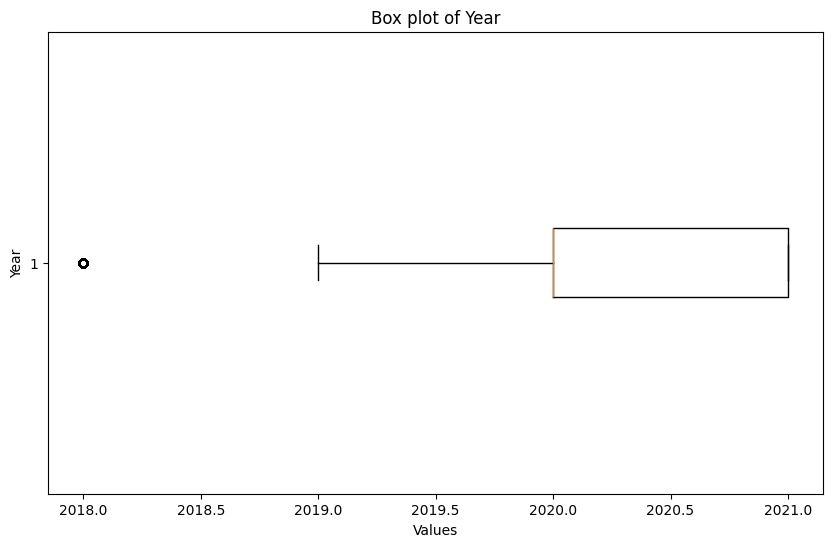

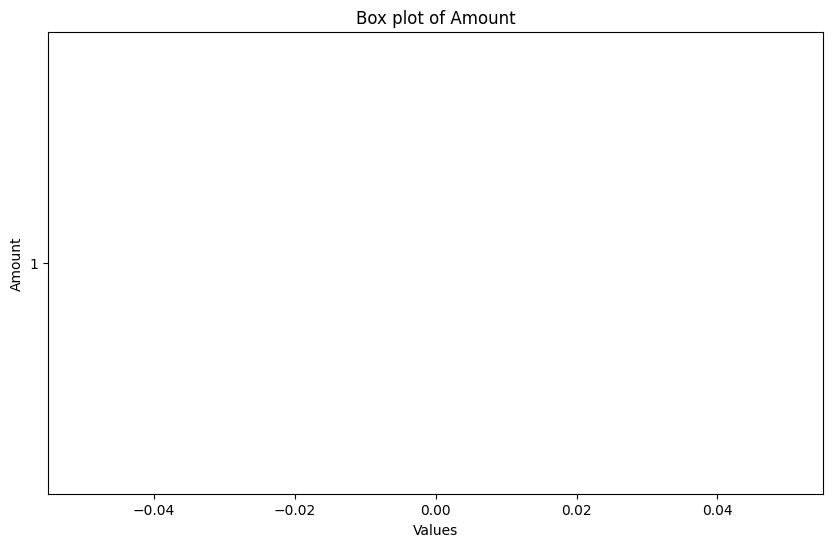

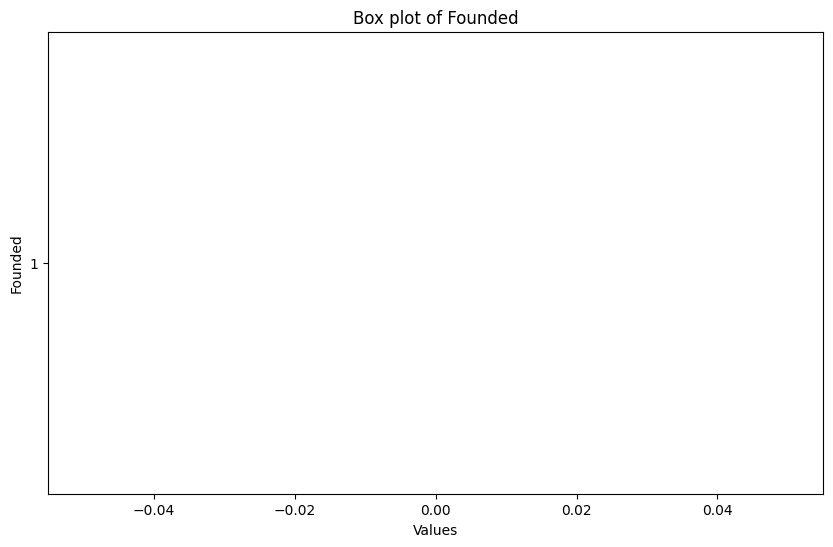

In [230]:
for column in num_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df_concat[column], vert=False)
    plt.title(f'Box plot of {column}')
    plt.xlabel('Values')
    plt.ylabel(column)
    plt.show()

**Observations**

- 2019 recorded the lowest funding frequency, this might be due to the covid 19 pandemic, there was a steep increase from 2019 to 2020, 2021 had the highest funding frequency

- The Amount column is skewed to the right with concentration at the left (lower) end

- Majority of Companies were founded between 2010 and 2021

In [231]:
#Looking at the year 2019 was the best year for receiving funding and 2020 was the worst could be as a result of covid 
fund_trend=df_concat.groupby('Year')['Amount'].sum()
fund_trend

Year
2018    6.641523e+09
2019    3.856397e+09
2020    9.004682e+10
2021    1.795758e+11
Name: Amount, dtype: float64

In [232]:
#fund_trend.plot.bar(title='Startup funding trends from 2018 to 2021')


<Figure size 2500x1500 with 0 Axes>

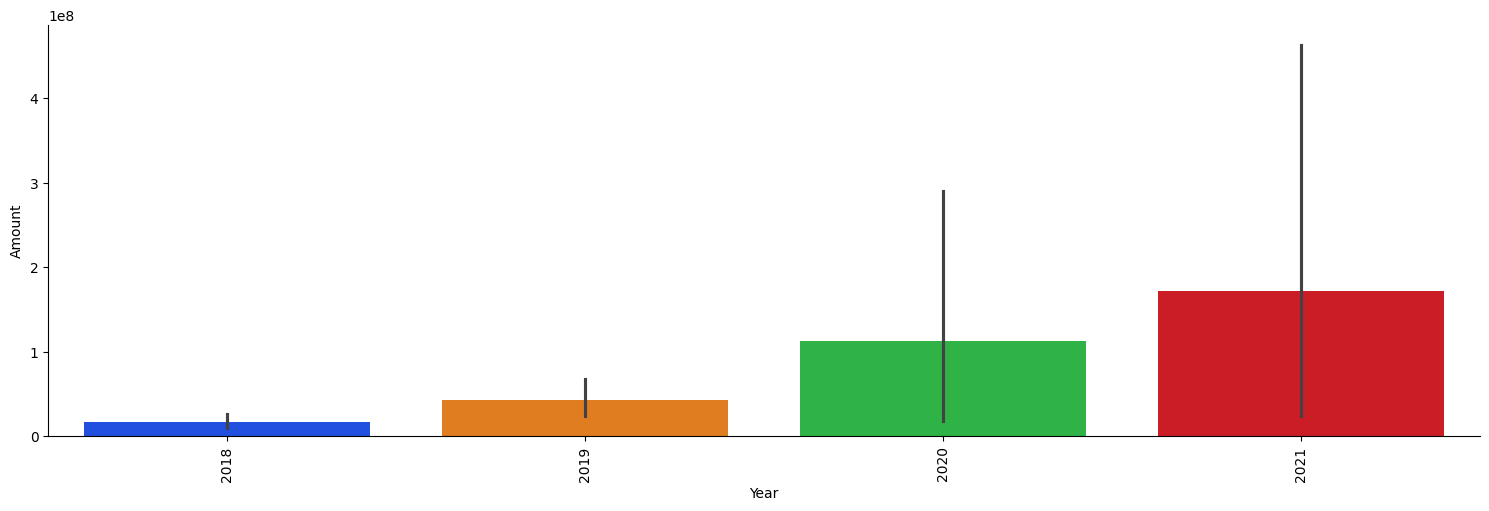

In [233]:
plt.figure(figsize=(25,15))
sns.catplot(data=df_concat, x='Year', y='Amount', kind='bar',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)

plt.show()

<Figure size 2500x1500 with 0 Axes>

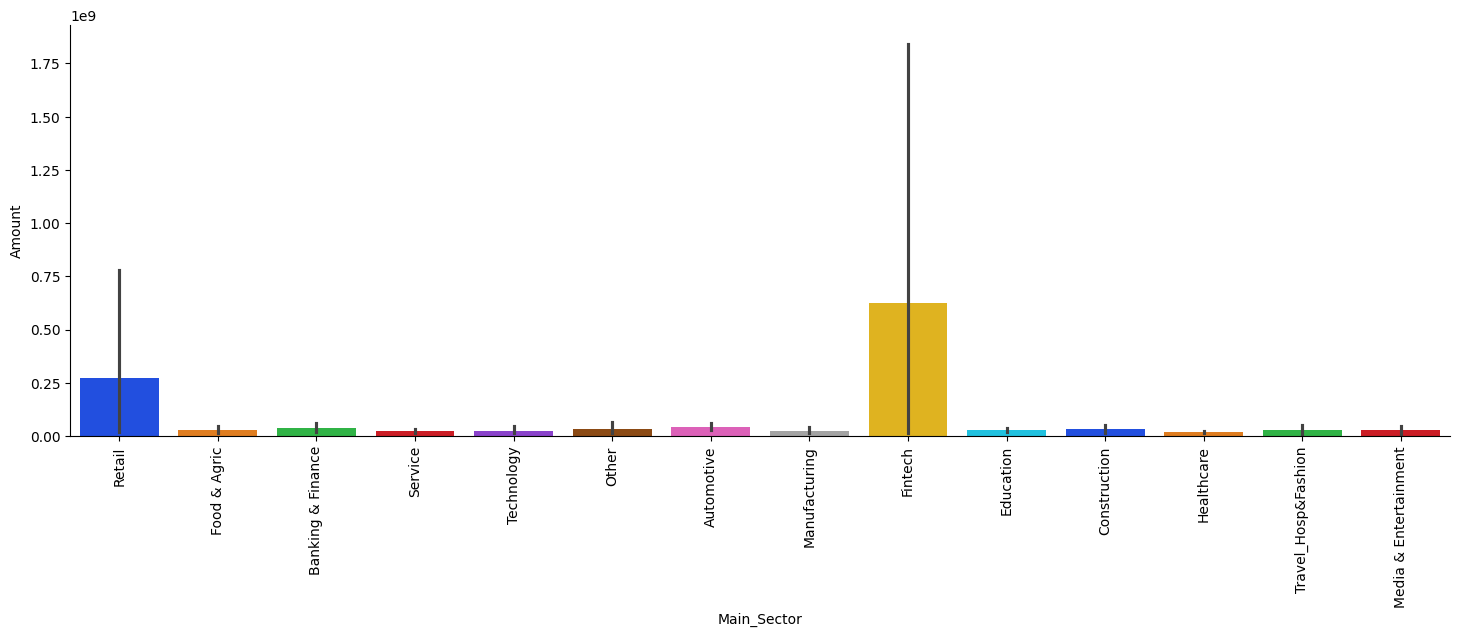

In [234]:
plt.figure(figsize=(25,15))
sns.catplot(data=df_concat, x='Main_Sector', y='Amount', kind='bar',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

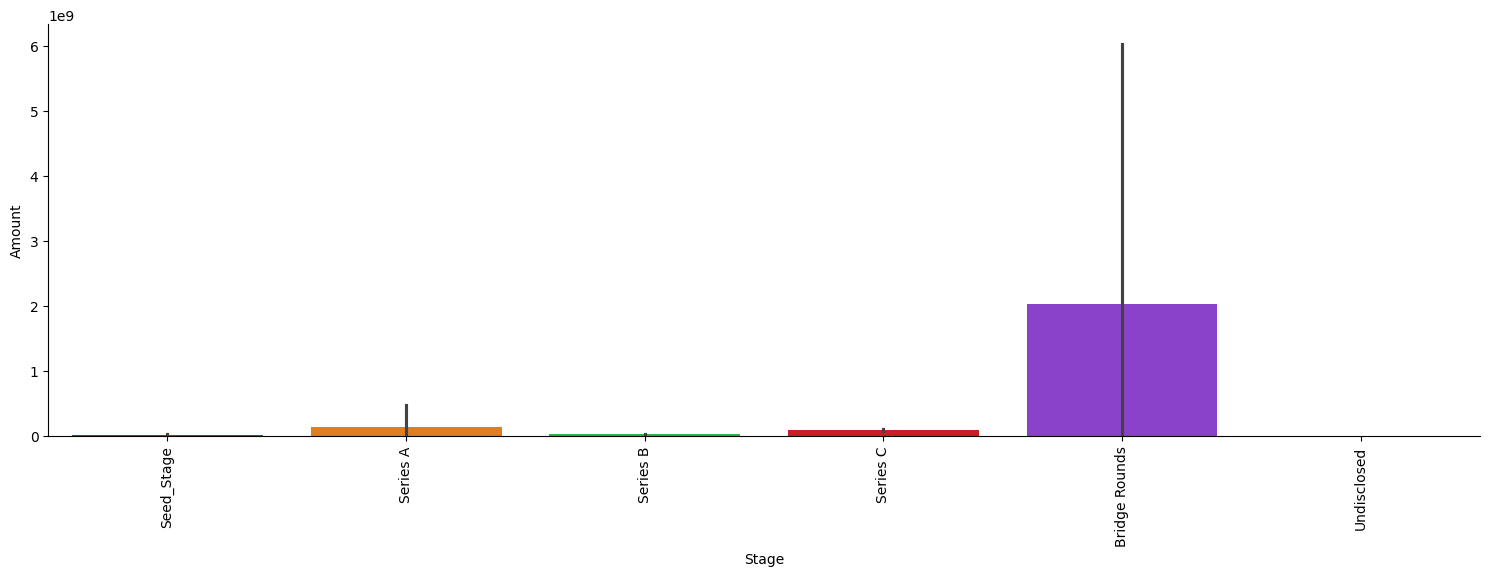

In [235]:
plt.figure(figsize=(25,15))
sns.catplot(data=df_concat, x='Stage', y='Amount', kind='bar',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

In [236]:
result = df_concat.groupby('Year').agg({'Amount': ['median', 'std']})
result


Amount              
          median           std
Year                          
2018   1300000.0  7.797261e+07
2019  11000000.0  1.028029e+08
2020   3000000.0  2.479695e+09
2021   3700000.0  4.646669e+09

<Axes: ylabel='Amount'>

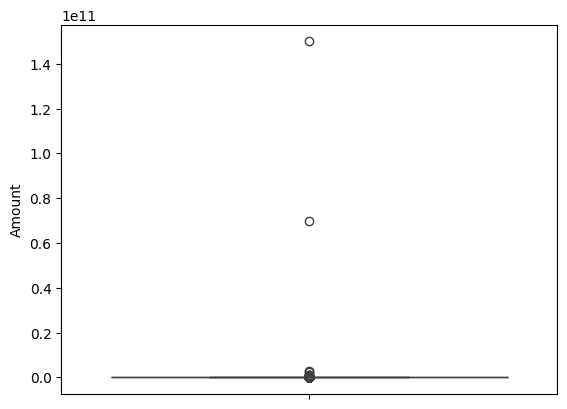

In [237]:
import seaborn as sns

sns.boxplot(df_concat['Amount'])

In [238]:
#Bangalore recieved the most funding of about 32% and Mumbai came close second with about 17% most 
#df_concat['Location'].value_counts(normalize=True).sort_values(ascending=False).head(10)

fund_per_location_top15=df_concat.groupby('Location')['Amount'].sum().sort_values(ascending=False).head(15)
fund_per_location_top15

Location
Mumbai        2.307711e+11
Bengaluru     2.510806e+10
Gurugram      5.591562e+09
New Delhi     3.420521e+09
California    3.078300e+09
Pune          1.439269e+09
Gurgaon       1.380056e+09
Chennai       1.123976e+09
Haryana       9.189850e+08
Delhi         8.706549e+08
Noida         6.735376e+08
Jaipur        5.828890e+08
Hyderabad     4.091624e+08
Shanghai      4.000000e+08
Thane         2.653400e+08
Name: Amount, dtype: float64

In [239]:
import matplotlib.pyplot as plt

# Calculate normalized value counts, sort in descending order
#location_counts = df_concat['Location'].value_counts(normalize=True).sort_values(ascending=False)[:10]


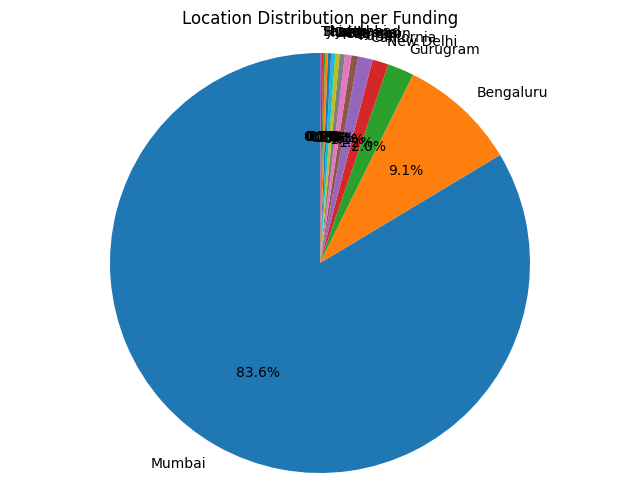

In [240]:
import seaborn as sns

# Create the pie chart

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.pie(fund_per_location_top15, labels=fund_per_location_top15.index, autopct='%1.1f%%', startangle=90)

plt.title('Location Distribution per Funding')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<Axes: ylabel='Location'>

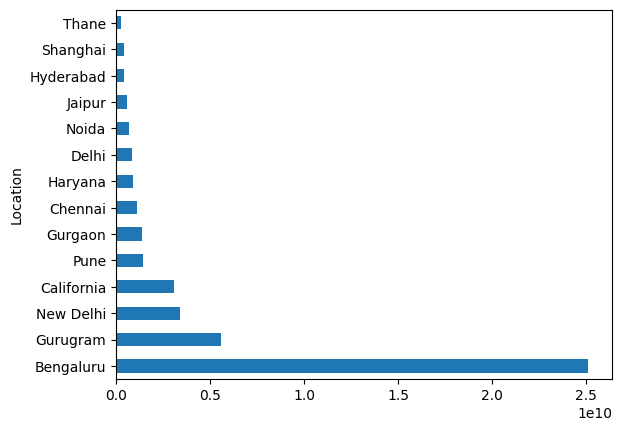

In [241]:
#without Mumbai
fund_per_location_top15[1:].plot.barh()

In [242]:
statup_location_top15=df_concat.groupby('Location')['Company_Brand'].count().sort_values(ascending=False).head(15)
statup_location_top15

Location
Bengaluru    935
Mumbai       466
Gurugram     239
New Delhi    229
Chennai      106
Pune         104
Delhi         88
Noida         86
Gurgaon       80
Hyderabad     76
Jaipur        31
Ahmedabad     29
Haryana       26
Kolkata       22
Indore        14
Name: Company_Brand, dtype: int64

<Axes: ylabel='Location'>

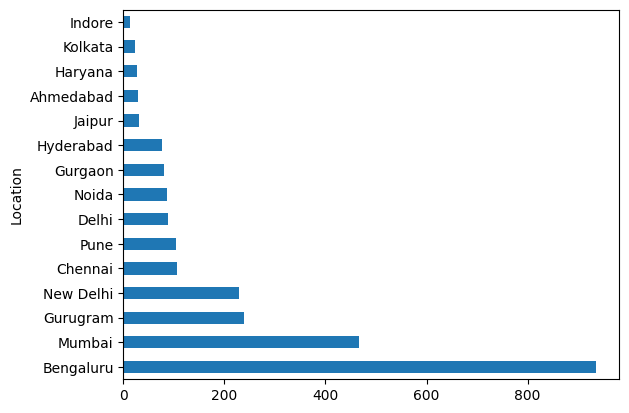

In [243]:
statup_location_top15.plot.barh()

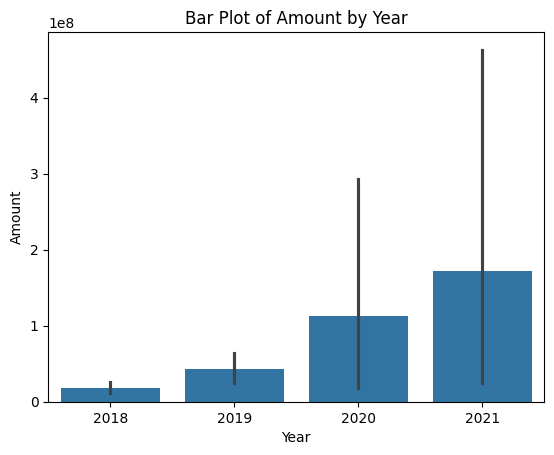

In [244]:
import seaborn as sns
# plotting  year by amount  shows 2021 was the best year 
sns.barplot(x='Year', y='Amount', data=df_concat)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Bar Plot of Amount by Year')
plt.show()

In [245]:
#df_concat.describe(include = 'all').T

In [246]:
Categoricals = [column for column in df_concat.columns if (df_concat[column].dtype == 'O')]
Categoricals

['Company_Brand',
 'Sector',
 'Stage',
 'Location',
 'About Company',
 'Currency',
 'Main_Sector',
 'Founders',
 'Investor']

In [247]:
#import plotly.express as px
# for categoricals
#for column in df_concat[Categoricals].columns:
    #fig = px.histogram(df_concat[Categoricals], text_auto = True, x = column, title = f'Distribution of values in {column} column')
    #fig.show()

In [248]:
Numericals = [column for column in df_concat.columns if (df_concat[column].dtype != 'O')]
Numericals

['Year', 'Amount', 'Founded']

In [249]:
# for Numerical
#for column in df_concat[Numericals].columns:
 #   fig = px.box(df_concat[Numericals],title = f'Distribution of values in {column} column')
  #  fig.show()

In [250]:
#for i in df_concat.columns:
  #  if df_concat[i].dtype == 'object':
 #      sns.countplot(x=i, data=df_concat)
 #       plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#        plt.title(f'Bar Plot of {i}')
 #       plt.show()

In [251]:
#for i in df_concat.columns:
    #if df_concat[i].dtype != 'object':
        #sns.boxplot(y=i, data=df_concat)
        #plt.xticks(rotation=45)
        #plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_concat is your DataFrame
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(df_concat.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [252]:
#Taking care of outliers in the numerical columns amount especially

seventy_fifth = df_concat['Amount'].quantile(0.75)
twenty_fifth = df_concat['Amount'].quantile(0.25)

iqr_amount = seventy_fifth-twenty_fifth 

upper = seventy_fifth+(1.5*iqr_amount)
lower = twenty_fifth-(1.5*iqr_amount)


In [253]:
outlier_rows = df_concat[(df_concat['Amount'] > upper) | (df_concat['Amount'] < lower)]

# Select specific columns 'Experience', 'Location', and 'Amount'
result = outlier_rows[['Stage', 'Location', 'Amount','Year']]

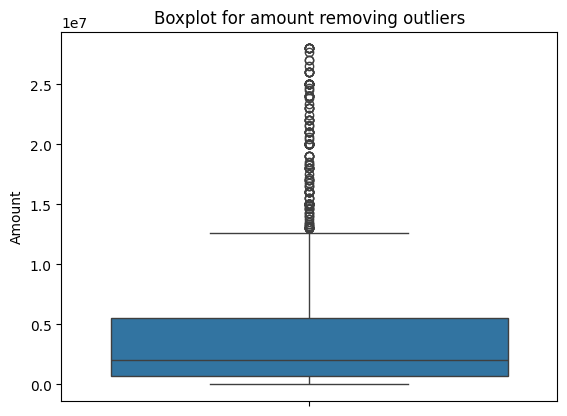

In [254]:
no_outliers_amount = df_concat[(df_concat.Amount > lower ) & (df_concat.Amount<upper)]



sns.boxplot(y='Amount', data=no_outliers_amount)
plt.xticks(rotation=45)
plt.title('Boxplot for amount removing outliers')
plt.show()